<a href="https://colab.research.google.com/github/fcastellanosp/MINE-4210_202420_ADL/blob/main/Talleres/Taller%201/Taller_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Challenge T√©cnico**

 ## **Candidato:** Danilo Andr√©s Alfonso Boh√≥rquez

# **Problem√°tica: La Falsificaci√≥n de Productos en Marketplaces como Mercado Libre**

La venta de productos falsificados en marketplaces digitales representa un problema creciente que afecta a consumidores, vendedores leg√≠timos y las propias plataformas de comercio electr√≥nico. En marketplaces como **Mercado Libre**, donde la oferta es vasta y los vendedores pueden operar con relativa facilidad, se ha vuelto com√∫n la comercializaci√≥n de productos que imitan marcas reconocidas, pero que no cumplen con los est√°ndares de calidad ni con los derechos de propiedad intelectual.

## **Impacto de la falsificaci√≥n**

### **1. Para los consumidores**  
- Pueden ser enga√±ados al comprar productos que parecen aut√©nticos pero que son de menor calidad o incluso peligrosos (ej. medicamentos, cosm√©ticos o electr√≥nicos).  
- En algunos casos, la compra de estos productos puede generar riesgos para la salud o la seguridad.  
- La dificultad para obtener reembolsos o garant√≠as al descubrir que el producto es falso.  

### **2. Para los vendedores leg√≠timos y marcas**  
- Reducci√≥n de ventas debido a la competencia desleal de productos falsificados.  
- Da√±o a la reputaci√≥n de sus productos y marcas.  
- P√©rdidas econ√≥micas derivadas de la falta de control sobre su propiedad intelectual.  

### **3. Para el marketplace**  
- P√©rdida de confianza por parte de los compradores en la plataforma.  
- Riesgo de enfrentar problemas legales y sanciones por la venta de productos falsificados.  
- Incremento en los costos operativos para implementar sistemas de verificaci√≥n y eliminaci√≥n de falsificaciones.  

## **Desaf√≠os en la soluci√≥n del problema**  
A pesar de los esfuerzos de los marketplaces para implementar sistemas de verificaci√≥n y denuncias, los falsificadores siguen encontrando formas de eludir los controles. Esto hace que el problema persista y evolucione constantemente, requiriendo mejores estrategias de detecci√≥n, regulaciones m√°s estrictas y una mayor educaci√≥n del consumidor sobre c√≥mo identificar productos falsificados.

---



#  Diccionario de Datos

| Campo               | Descripci√≥n |
|---------------------|-------------|
| **element_id**      | Id de producto |
| **site_id**         | Pa√≠s |
| **seller_id**       | Id del vendedor |
| **Dominio_normalizado** | Categor√≠a del producto |
| **Titulo**         | T√≠tulo del producto |
| **Marca**          | Marca publicada del producto |
| **Precio**         | Precio del producto |
| **Rule**           | Regla con la que se moder√≥ la publicaci√≥n |
| **Score**          | Score del modelo de Machine Learning. Utilizado por la regla "FK_MODELO" |
| **Moderado**       | Flag que indica que el producto fue moderado por alguna regla |
| **Fake**           | Flag que indica que el producto es un producto falsificado. Taggeado de forma manual |
| **Rollback**       | Flag que indica que luego de la moderaci√≥n, la misma fue revertida por un operador de Atenci√≥n al Cliente ante reclamo de usuario |
| **FK_TEST1**       | Regla de test. Actualmente apagada. Si detecta que es Fake, FK_TEST1 = 1 |
| **FK_TEST2**       | Regla de test. Actualmente apagada. Si detecta que es Fake, FK_TEST2 = 1 |

üìå **Instrucciones:**  
- Este diccionario de datos describe los campos utilizados en el an√°lisis de productos moderados y falsificados.  


# 0. Configuraci√≥n Inicial

### 0.1 Importaci√≥n de Paquetes

In [308]:
# Data Management
import os
import zipfile
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
from IPython.display import display, HTML
# Data Upload and Profiling
from google.colab import files

### 0.2 Carga de datos

In [ ]:
# Read csv
import pandas as pd

df = pd.read_csv('data_moderaciones.csv', encoding='latin1', delimiter=';')


Finalmente, podemos comprobar que el dataset fue descargado, descomprimido e importado exitosamente.

In [ ]:
# Showing a sample of csv data
df.head(5)

element_id    site_id   seller_id   Dominio_normalizado  \
0  ARG1000130348  ARGENTINA   924394736   COMPUTER_PROCESSORS   
1  ARG1002056504  ARGENTINA    60385780     COMPUTER_MONITORS   
2  ARG1002630435  ARGENTINA  1085316688            SUNGLASSES   
3  ARG1003499360  ARGENTINA   189266308  HARD_DRIVES_AND_SSDS   
4  ARG1004623658  ARGENTINA   127503700    RAM_MEMORY_MODULES   

                                              Titulo     Marca      Precio  \
0  Microprocesador Intel Core I3 12100 12mb Bx807...     Intel  222.599,00   
1  Monitor Gamer Samsung Con Pantalla De 25  60hz...   Samsung  767.000,00   
2  Anteojos De Sol Polarizados Ray-ban Erika Clas...   Ray-Ban  246.510,00   
3  Ssd Externo Kingston Xs1000 1tb Negro Usb 3.2 ...  Kingston  179.999,00   
4  Memoria Ram Valueram Color Verde 8gb 1 Kingsto...  Kingston   22.399,00   

  Rule    Score  Total Moderado  Fake  Rollback  FK_TEST1  FK_TEST2  
0  NaN  0,11000      1     0,00  0,00         0         0         0  
1  NaN  0,29000      1     0,00  0,00         0         0         0  
2  NaN  0,51000      1     0,00  0,00         0         0         0  
3  NaN  0,32000      1     0,00  0,00         0         0         0  
4  NaN      0,8      1     0,00  0,00         0         0         0

In [ ]:
# Verificar si hay valores √∫nicos en la columna 'Fake'
df["Fake"].unique()


array(['0,00', '1,00'], dtype=object)

In [ ]:
print("Filas:", df.shape[0])
print("Columnas:", df.shape[1])

Filas: 40372
Columnas: 15


# 1 Preprocesamiento de los datos

## 1.1 Tipos de datos

Procederemos a dividir las columnas del dataset en distintos tipos de datos

In [ ]:
# Columns and Datatypes
df.dtypes

element_id             object
site_id                object
seller_id               int64
Dominio_normalizado    object
Titulo                 object
Marca                  object
Precio                 object
Rule                   object
Score                  object
Total                   int64
Moderado               object
Fake                   object
Rollback                int64
FK_TEST1                int64
FK_TEST2                int64
dtype: object

In [ ]:

# Conversi√≥n de tipos
df['element_id'] = df['element_id'].astype(str)


# Convertir a float
df['Precio'] = df['Precio'].astype(str)
df['Precio'] = df['Precio'].str.replace(r'[^\d,.-]', '', regex=True)  # Eliminar s√≠mbolos extra√±os

# Si los valores est√°n en formato "1.234,56", convertimos correctamente
df['Precio'] = df['Precio'].apply(lambda x: x.replace('.', '').replace(',', '.') if ',' in x else x)

# Convertir a float
df['Precio'] = pd.to_numeric(df['Precio'], errors='coerce')
df['Score'] = df['Score'].astype(str)
df['Score'] = df['Score'].str.replace(r'[^\d,.-]', '', regex=True)  # Eliminar s√≠mbolos extra√±os

# Si los valores est√°n en formato "1.234,56", convertimos correctamente
df['Score'] = df['Score'].apply(lambda x: x.replace('.', '').replace(',', '.') if ',' in x else x)

# Convertir a float
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')

df['Score'] = pd.to_numeric(df['Score'], errors='coerce')
df['Moderado'] =  df["Moderado"].astype(str).str.replace(",", ".").astype(float).astype(bool)
df["Fake"] = df["Fake"].astype(str).str.replace(",", ".").astype(float).astype(bool)


df['site_id'] = df['site_id'].astype(str)
df['seller_id'] = df['seller_id'].astype(int)

df['Rollback'] = df['Rollback'].astype(int)
df['FK_TEST1'] = df['FK_TEST1'].astype(int)
df['FK_TEST2'] = df['FK_TEST2'].astype(int)

# Verificar cambios
print(df.dtypes)


element_id              object
site_id                 object
seller_id                int64
Dominio_normalizado     object
Titulo                  object
Marca                   object
Precio                 float64
Rule                    object
Score                  float64
Total                    int64
Moderado                  bool
Fake                      bool
Rollback                 int64
FK_TEST1                 int64
FK_TEST2                 int64
dtype: object


In [ ]:
df.head()

element_id    site_id   seller_id   Dominio_normalizado  \
0  ARG1000130348  ARGENTINA   924394736   COMPUTER_PROCESSORS   
1  ARG1002056504  ARGENTINA    60385780     COMPUTER_MONITORS   
2  ARG1002630435  ARGENTINA  1085316688            SUNGLASSES   
3  ARG1003499360  ARGENTINA   189266308  HARD_DRIVES_AND_SSDS   
4  ARG1004623658  ARGENTINA   127503700    RAM_MEMORY_MODULES   

                                              Titulo     Marca     Precio  \
0  Microprocesador Intel Core I3 12100 12mb Bx807...     Intel 222,599.00   
1  Monitor Gamer Samsung Con Pantalla De 25  60hz...   Samsung 767,000.00   
2  Anteojos De Sol Polarizados Ray-ban Erika Clas...   Ray-Ban 246,510.00   
3  Ssd Externo Kingston Xs1000 1tb Negro Usb 3.2 ...  Kingston 179,999.00   
4  Memoria Ram Valueram Color Verde 8gb 1 Kingsto...  Kingston  22,399.00   

  Rule  Score  Total  Moderado   Fake  Rollback  FK_TEST1  FK_TEST2  
0  NaN   0.11      1     False  False         0         0         0  
1  NaN   0.29      1     False  False         0         0         0  
2  NaN   0.51      1     False  False         0         0         0  
3  NaN   0.32      1     False  False         0         0         0  
4  NaN   0.80      1     False  False         0         0         0

Por lo tanto, tenemos la siguiente clasificaci√≥n para nuestras variables:

## 1.2 EDA: An√°lisis Univariado/ Bivariado

## 1.2.1 Variables Texto

Si observamos las variables que el data profilling calific√≥ como tipo texto, podemos observar que no presentan informaci√≥n relevante para nuestro problema de clasificaci√≥n.

Esto se debe a su alta cardinalidad y problemas en los datos, posiblemente debidos a errores humanos al guardar la informaci√≥n.

### 1.2.2 Variable n√∫mericas

Podemos visualizar algunas metricas interesantes de las variables n√∫mericas:  

In [ ]:
#Creamos una lista de monedas de cambio por cada uno de los pa√≠ses

# Diccionario de tasas de cambio: site_id -> tasa de cambio a USD
exchange_rates = {
    'ARGENTINA': 1058.40,  # Argentina
    'BRASIL': 5.73,     # Brasil
    'CHILE': 947,      # Chile
    'COLOMBIA': 4081.00,  # Colombia
    'MEXICO': 20.42,    # M√©xico
    'PERU': 3.68,     # Per√∫
}


# Funci√≥n para convertir el precio a USD
def convertir_a_usd(row):
    tasa_cambio = exchange_rates.get(row['site_id'])
    if tasa_cambio and row['Precio']:
        return row['Precio'] / tasa_cambio
    else:
        return None

# Crear la nueva columna 'Precio_USD'
df['Precio_USD'] = df.apply(convertir_a_usd, axis=1)

# Verificar los cambios
print(df[['site_id', 'Precio', 'Precio_USD']].head())


     site_id     Precio  Precio_USD
0  ARGENTINA 222,599.00      210.32
1  ARGENTINA 767,000.00      724.68
2  ARGENTINA 246,510.00      232.91
3  ARGENTINA 179,999.00      170.07
4  ARGENTINA  22,399.00       21.16


In [306]:
#Validaci√≥n para el caso de Colombia
df_colombia = df[df['site_id'].str.upper() == 'COLOMBIA']
df_colombia.head(3)

element_id   site_id   seller_id Dominio_normalizado  \
28196   COL100595150  COLOMBIA   952153316          CELLPHONES   
28197  COL1009357490  COLOMBIA  1588356620        WRISTWATCHES   
28198  COL1012961829  COLOMBIA  4286400084          SUNGLASSES   

                                                  Titulo    Marca     Precio  \
28196  Samsung Galaxy A05s Dual Sim 128 Gb Plateado 4...  Samsung 372,450.00   
28197            Reloj Casio Hombre F-94wa-9dg Core Mens    Casio 153,000.00   
28198  Gafas De Sol Ray-ban Erika Metal Standard, Col...  Ray-Ban 700,000.00   

           Rule  Score  Total  Moderado  Fake  Rollback  FK_TEST1  FK_TEST2  \
28196  FK_PRICE   0.99      1         1     1         0         1         0   
28197       NaN   0.04      1         0     0         0         0         0   
28198       NaN   0.14      1         0     0         0         0         0   

       Precio_USD        Precio_bin  Rollback_Tasa  Totales  
28196       91.26   $67.22 - $95.45           0.00        1  
28197       37.49   $25.78 - $43.26            NaN        0  
28198      171.53  $132.3 - $184.81            NaN        0

In [ ]:
# Dividing columns
text_columns = ['element_id','seller_id']
categorical_columns = ['site_id','Moderado'	'Fake	Rollback','FK_TEST1','FK_TEST2']
numeric_columns = ['Score','Precio_USD']

In [ ]:
# Describe for numeric columns
pd.set_option('display.float_format', '{:,.2f}'.format)
df[numeric_columns].describe()

Score  Precio_USD
count 40,372.00   40,372.00
mean       0.43      348.57
std        0.33      560.56
min        0.00        1.74
25%        0.15       54.21
50%        0.31      132.30
75%        0.81      350.63
max        1.00    9,130.40

### 1.2.3 Comparaci√≥n del Precio (Productos leg√≠timos) vs (Productos Falsos)

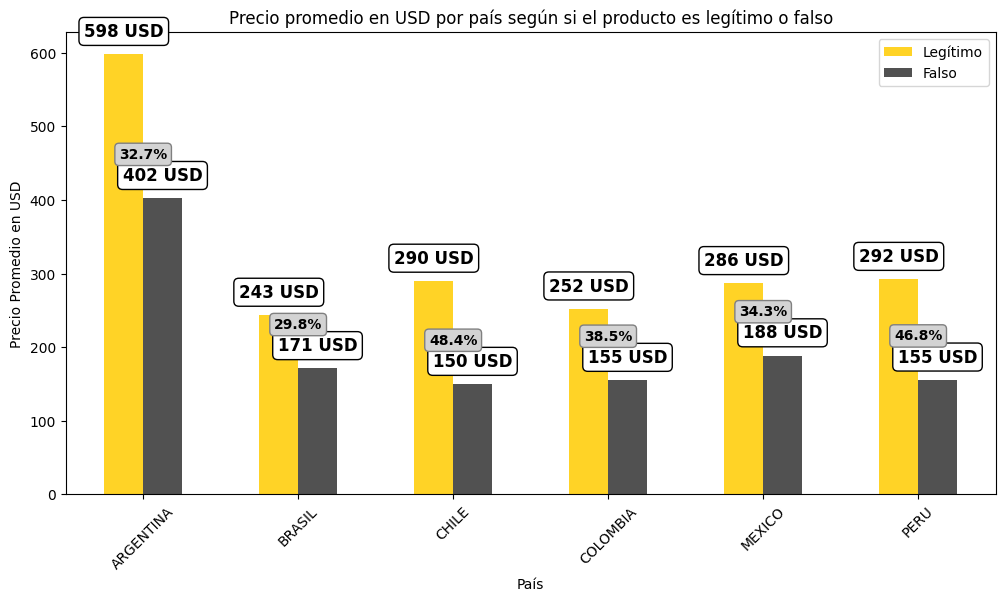

In [ ]:
#  Calcular el precio promedio por pa√≠s y autenticidad del producto
precio_promedio_por_pais = df.groupby(["site_id", "Fake"])["Precio_USD"].mean().unstack()

precio_promedio_por_pais.rename(columns={False: "Leg√≠timo", True: "Falso"}, inplace=True)

precio_promedio_por_pais["Diferencia (%)"] = (
    (precio_promedio_por_pais["Leg√≠timo"] - precio_promedio_por_pais["Falso"]) / precio_promedio_por_pais["Leg√≠timo"]
) * 100

mercado_libre_colors = ["#FFCC00", "#333333"]

fig, ax = plt.subplots(figsize=(12, 6))

# Graficar barras
precio_promedio_por_pais[["Leg√≠timo", "Falso"]].plot(kind="bar", ax=ax, alpha=0.85, color=mercado_libre_colors)
ax.set_xlabel("Pa√≠s")
ax.set_ylabel("Precio Promedio en USD")
ax.set_title("Precio promedio en USD por pa√≠s seg√∫n si el producto es leg√≠timo o falso")
ax.legend(["Leg√≠timo", "Falso"])
ax.set_xticklabels(precio_promedio_por_pais.index, rotation=45)

ax.grid(False)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        offset = 0.03 * ax.get_ylim()[1]
        ax.annotate(f'{height:,.0f} USD',
                    (p.get_x() + p.get_width() / 2., height + offset),
                    ha='center', va='bottom', fontsize=12, fontweight='bold', color='black',
                    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

#  Agregar etiquetas con la diferencia porcentual en cada pa√≠s (sobre la barra falsa)
for i, (idx, row) in enumerate(precio_promedio_por_pais.iterrows()):
    diff = row["Diferencia (%)"]
    offset = 0.08 * ax.get_ylim()[1]
    ax.annotate(f'{diff:.1f}%',
                (i, max(row["Falso"], 0) + offset),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black',
                bbox=dict(facecolor='lightgray', edgecolor='gray', boxstyle='round,pad=0.3'))
plt.show()




##  Tendencias Generales
- **Los productos leg√≠timos son m√°s caros en todos los pa√≠ses** en comparaci√≥n con los productos falsos.
- La **diferencia de precio var√≠a significativamente por pa√≠s**, lo que sugiere que en algunos pa√≠ses los productos falsos tienen un precio muy inferior al original, mientras que en otros la brecha es menor.

##  1.2.3.1 Comparaci√≥n por Pa√≠s
| Pa√≠s       | Precio Leg√≠timo (USD) | Precio Falso (USD) | Diferencia (%) |
|------------|----------------------|--------------------|----------------|
| **Argentina** | 598 | 402 | -32.7% |
| **Brasil** | 243 | 171 | -29.8% |
| **Chile** | 290 | 150 | -48.4% |
| **Colombia** | 252 | 155 | -38.5% |
| **M√©xico** | 286 | 188 | -34.3% |
| **Per√∫** | 292 | 155 | -46.8% |

## 1.2.3.2. An√°lisis por Porcentajes
- Los pa√≠ses con **mayor reducci√≥n porcentual** entre productos leg√≠timos y falsos son **Chile (-48.4%) y Per√∫ (-46.8%)**, indicando que en estos pa√≠ses los productos falsos tienen precios mucho m√°s bajos.
- **Brasil (-29.8%) y Argentina (-32.7%)** tienen diferencias m√°s peque√±as, sugiriendo que los productos falsificados en estos pa√≠ses tienen precios relativamente m√°s cercanos a los originales.

##  Conclusi√≥n
- **La falsificaci√≥n representa una reducci√≥n significativa en el precio en todos los pa√≠ses**, variando entre **-29.8% y -48.4%**.
- **Chile y Per√∫ tienen la mayor diferencia porcentual**, lo que indica que los productos falsos en estos pa√≠ses se venden a precios mucho m√°s bajos.
- **Argentina, Brasil y M√©xico tienen diferencias menores**, lo que podr√≠a sugerir que los productos falsificados en estos pa√≠ses tienen una percepci√≥n de mayor calidad o que los consumidores est√°n dispuestos a pagar m√°s por ellos.


### 1.2.4 Distribuci√≥n de los precios (USD)

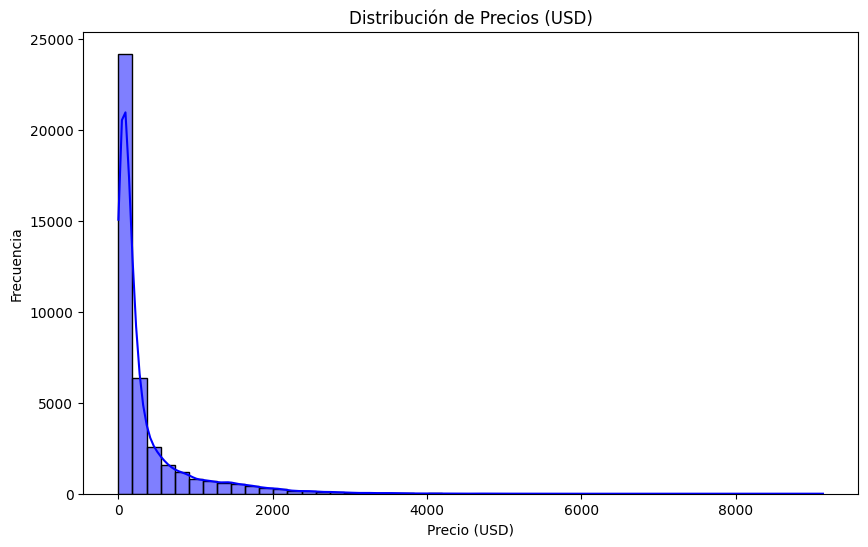

In [ ]:
# Crear un histograma de los precios
plt.figure(figsize=(10, 6))
sns.histplot(df['Precio_USD'], bins=50, kde=True, color='blue')
plt.title('Distribuci√≥n de Precios (USD)')
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')
plt.show()


### 1.2.5 Precio Promedio por Categoria y Marca en d√≥lares(USD)

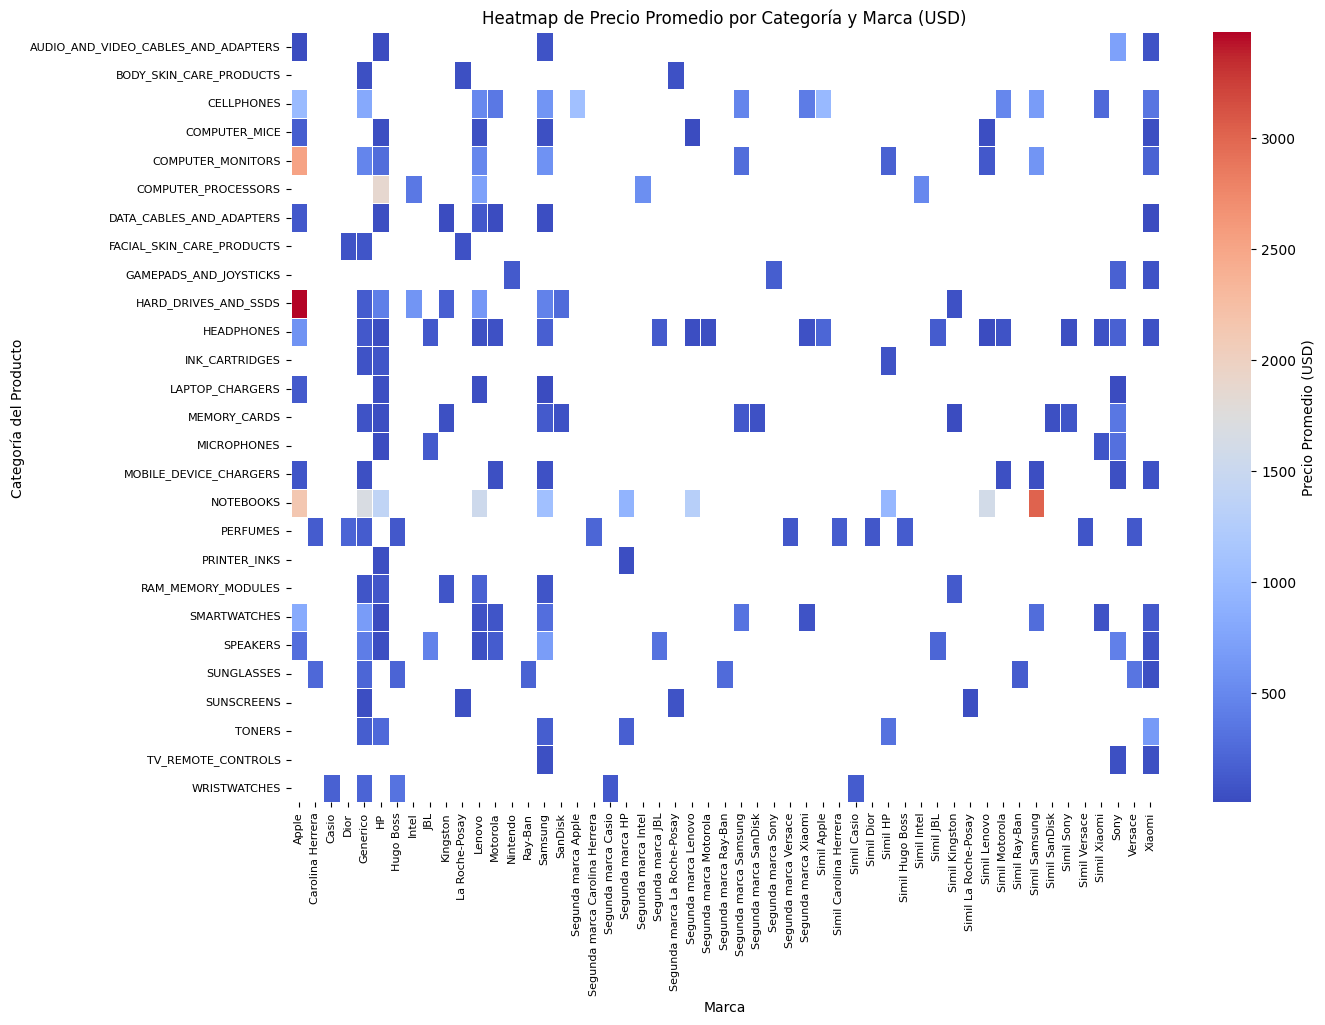

In [ ]:

if "Precio_USD" in df.columns and "Marca" in df.columns and "Dominio_normalizado" in df.columns:
    # Calcular el precio promedio por categor√≠a y marca
    heatmap_data = df.groupby(["Dominio_normalizado", "Marca"])["Precio_USD"].mean().unstack()

    # Eliminar valores nulos para que solo queden las marcas que realmente venden en esa categor√≠a
    heatmap_data = heatmap_data.dropna(how="all", axis=0).dropna(how="all", axis=1)

    plt.figure(figsize=(14, 10))
    sns.heatmap(
        heatmap_data, cmap="coolwarm", annot=False, linewidths=0.5,
        cbar_kws={'label': 'Precio Promedio (USD)'}
    )
    plt.title("Heatmap de Precio Promedio por Categor√≠a y Marca (USD)")
    plt.xlabel("Marca")
    plt.ylabel("Categor√≠a del Producto")
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(fontsize=8)
    plt.show()
else:
    print("No se encontraron las columnas necesarias para el heatmap.")






### 1.2.5.1 Diferencias Significativas de Precio entre Marcas
- En categor√≠as como **Hard Drives and SSDs, Headphones y Perfumes**, algunas marcas tienen precios significativamente m√°s altos (zonas rojas).
- Esto sugiere que ciertas marcas dominan el segmento premium, mientras que otras ofrecen alternativas m√°s asequibles.

### 1.2.5.2 "Segundas Marcas" y "Simil" con Precios M√°s Bajos
- Muchas marcas con etiquetas como **"Simil" y "Segunda Marca"** tienen celdas azul oscuro, indicando precios mucho m√°s bajos.
- Esto sugiere una fuerte presencia de productos alternativos a las marcas originales en algunas categor√≠as.

### 1.2.5.3 Alta Dispersi√≥n de Precios en Algunas Categor√≠as
- En **Computadoras, Relojes y Celulares**, hay productos con precios extremadamente altos y otros con precios bajos dentro de la misma categor√≠a.
- Esto indica la presencia de modelos premium y versiones m√°s accesibles en el mercado.

### 1.2.5.4 Categor√≠as con Precios Consistentemente Bajos
- **TV Remote Controls, Ink Cartridges y Memory Cards** muestran tendencias hacia precios bajos en todas las marcas.
- Esto indica que estas categor√≠as est√°n m√°s **commoditizadas**, es decir, los productos son similares entre marcas y compiten principalmente en precio.

### 1.2.5.4 Marcas Premium con Presencia en M√∫ltiples Categor√≠as
- Marcas como **Apple, Samsung y Xiaomi** aparecen en varias categor√≠as con precios elevados.
- Esto indica que mantienen un posicionamiento premium en distintos segmentos.

### 1.2.5.5  Patrones en Tecnolog√≠a vs. Moda y Cuidado Personal
- En **computadoras y procesadores**, los precios est√°n m√°s distribuidos (mezcla de azul y rojo).
- En **perfumes y gafas de sol**, hay un mayor n√∫mero de precios elevados en pocas marcas dominantes.

---




### 1.2.6 Relaci√≥n del precio con las moderaciones y las falsificaciones

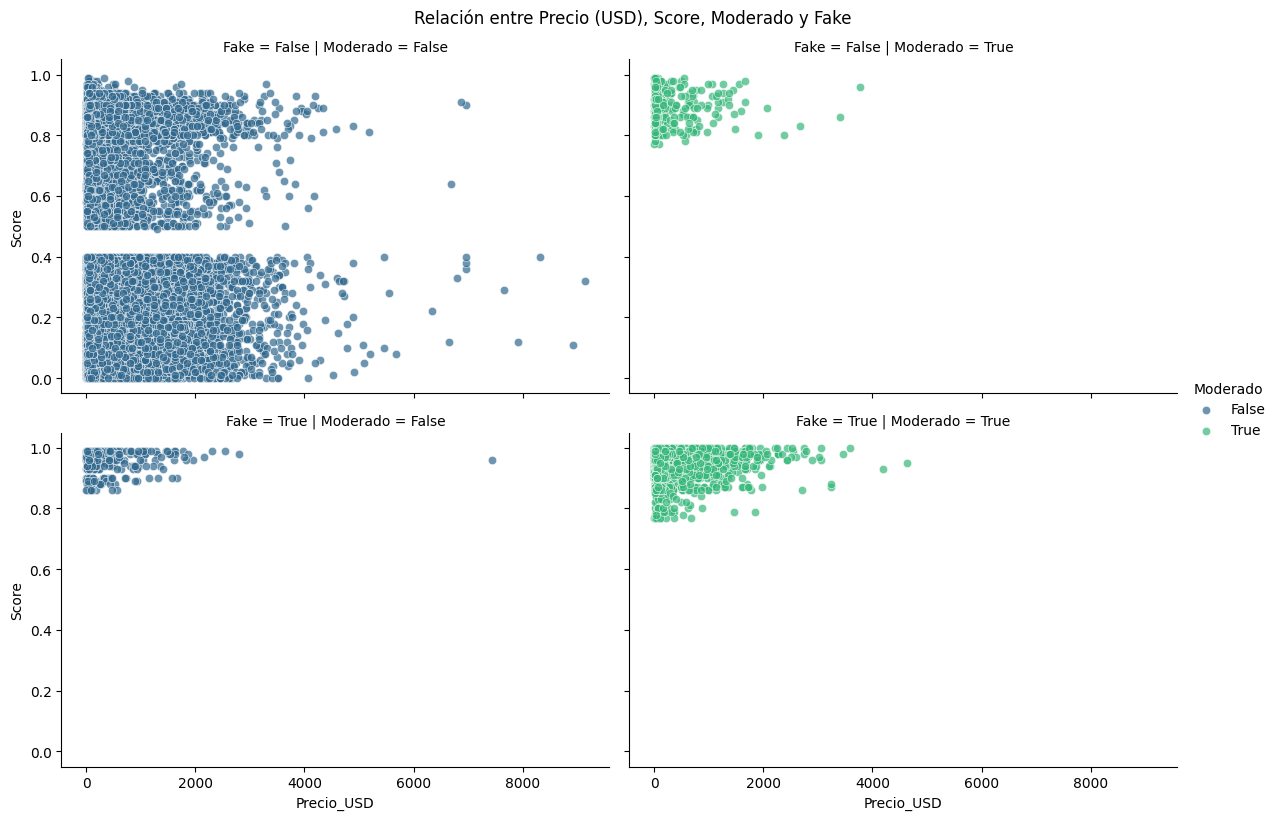

In [ ]:
g = sns.FacetGrid(df, col='Moderado', row='Fake', hue='Moderado', palette='viridis', height=4, aspect=1.5)
g.map(sns.scatterplot, 'Precio_USD', 'Score',alpha=0.7, sizes=(20, 200))
g.add_legend(title='Moderado')
plt.suptitle('Relaci√≥n entre Precio (USD), Score, Moderado y Fake', y=1.02)
plt.show()


- La mayor√≠a de los productos leg√≠timos no moderados tienen Scores bajos, pero algunos tienen incertidumbre en la clasificaci√≥n.
- Los productos leg√≠timos moderados son escasos y tienen alta confianza en su autenticidad.
- Los productos falsos no moderados suelen ser baratos y detectados con alta certeza.
- Los productos falsos moderados tienen una mayor dispersi√≥n de precios, lo que sugiere falsificaciones premium.
- Revisar los productos con Scores intermedios (0.5 - 0.7), ya que podr√≠an necesitar verificaci√≥n manual adicional.

In [ ]:
# Asegurar que 'Moderado' y 'Fake' sean booleanos
df["Moderado"] = df["Moderado"].astype(str).str.strip().map({"True": True, "False": False})
df["Fake"] = df["Fake"].astype(str).str.strip().map({"True": True, "False": False})

# Confirmar que la conversi√≥n fue exitosa
print(df[["Moderado", "Fake"]].dtypes)


Moderado    bool
Fake        bool
dtype: object


### 1.2.7 Tasa de moderaci√≥n y falsificaci√≥n por rangos de precio en USD

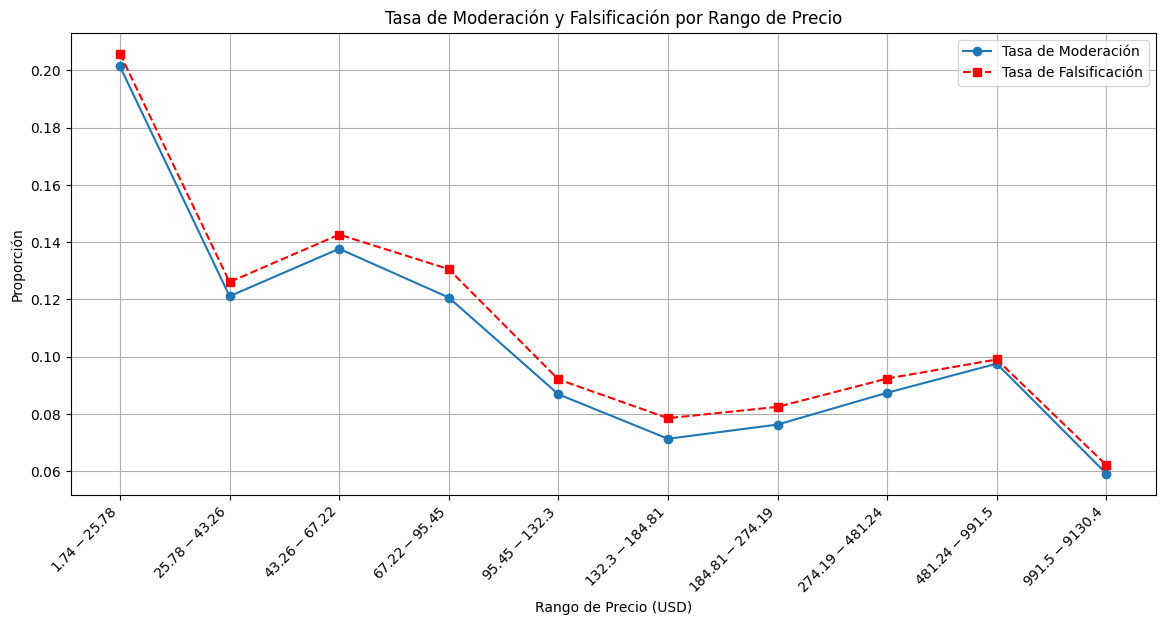

In [ ]:
precio_bins, bin_edges = pd.qcut(df["Precio_USD"], q=10, duplicates="drop", retbins=True)

precio_labels = [f"${round(bin_edges[i], 2)} - ${round(bin_edges[i+1], 2)}" for i in range(len(bin_edges)-1)]
df["Precio_bin"] = pd.qcut(df["Precio_USD"], q=10, duplicates="drop", labels=precio_labels)

# Calcular tasas de moderaci√≥n y falsificaci√≥n con `observed=True`
moderacion_rate = df.groupby("Precio_bin", observed=True)["Moderado"].mean()
fake_rate = df.groupby("Precio_bin", observed=True)["Fake"].mean()

plt.figure(figsize=(14, 6))
plt.plot(precio_labels, moderacion_rate, marker="o", linestyle="-", label="Tasa de Moderaci√≥n")
plt.plot(precio_labels, fake_rate, marker="s", linestyle="--", color="red", label="Tasa de Falsificaci√≥n")

plt.title("Tasa de Moderaci√≥n y Falsificaci√≥n por Rango de Precio")
plt.xlabel("Rango de Precio (USD)")
plt.ylabel("Proporci√≥n")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.grid()
plt.show()




- **Los productos m√°s baratos tienen la tasa de falsificaci√≥n y moderaci√≥n m√°s alta**

En el primer rango de precios (**1.14 - 25.78**), la tasa de falsificaci√≥n y la tasa de moderaci√≥n son las m√°s altas (20%).
Esto sugiere que los productos de bajo costo son m√°s propensos a falsificaci√≥n y requieren m√°s moderaci√≥n para verificar su autenticidad.
Ejemplo: Accesorios electr√≥nicos, memorias USB, cargadores, cosm√©ticos econ√≥micos, etc.
- **A medida que el precio aumenta, ambas tasas disminuyen hasta los $132.3 USD**

La moderaci√≥n y la falsificaci√≥n bajan gradualmente, lo que indica que los productos en este rango tienen menor riesgo de ser falsificados.
Es posible que los productos en este rango sean menos atractivos para falsificadores o que tengan m√°s barreras de autenticidad.

-**Entre 274.19 y 991.5 USD, la falsificaci√≥n y la moderaci√≥n aumentan nuevamente**

En este rango de precios se observa un repunte en la tasa de falsificaci√≥n y moderaci√≥n.
Esto puede deberse a que los productos de gama media-alta comienzan a atraer m√°s falsificaciones (ejemplo: electr√≥nicos, relojes, perfumes premium).

- **Los productos m√°s caros (+991.5 USD) tienen la tasa m√°s baja de moderaci√≥n y falsificaci√≥n**

Esto puede indicar que los productos de gama alta tienen menos falsificaciones o mejores controles de autenticidad.
Otra posibilidad es que estos productos tengan menor volumen de ventas, por lo que hay menos revisiones y menos falsificaciones en comparaci√≥n con otras categor√≠as.

### 1.2.8 Cantidad de productos y precio promedio por vendedor (Leg√≠timos y Falsos)

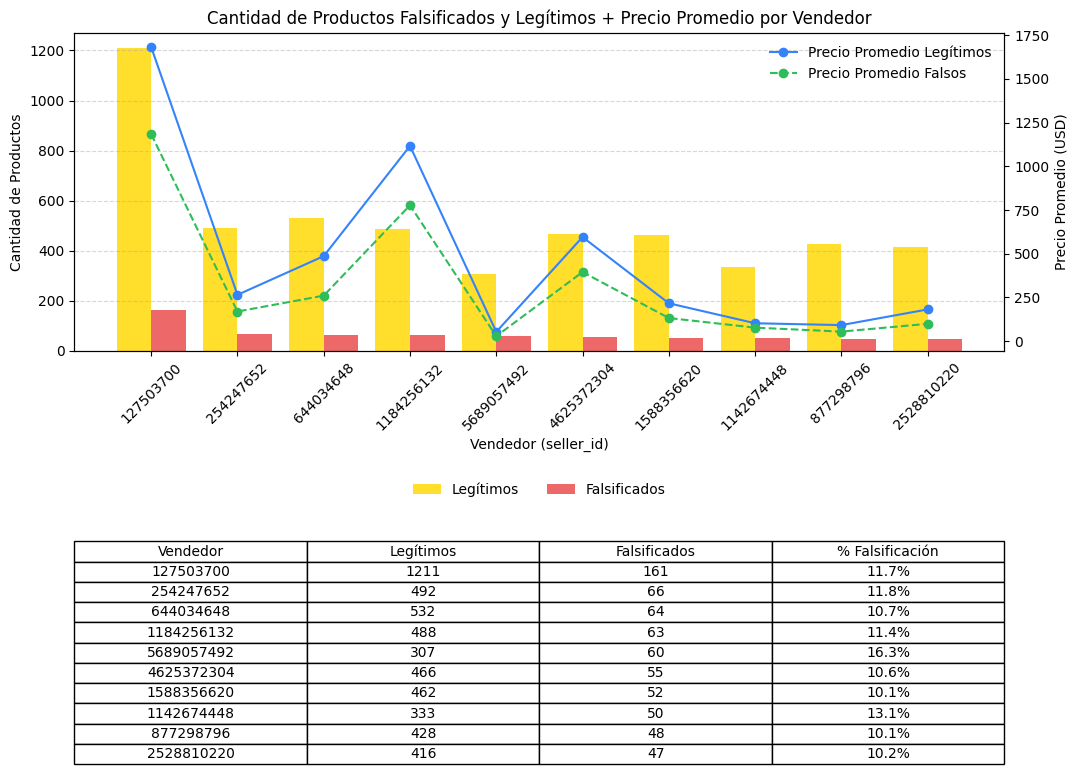

In [ ]:
meli_yellow = "#FFDB15"
meli_red = "#EB5757"
meli_blue = "#3483FA"
meli_green = "#2EBD59"

# Agrupar datos por vendedor y calcular m√©tricas
sellers_stats = df.groupby("seller_id").agg(
    Productos_Totales=("Fake", "count"),
    Productos_Falsificados=("Fake", "sum"),
    Precio_Promedio_Legitimos=("Precio_USD", lambda x: np.mean(x[df.loc[x.index, "Fake"] == False])),
    Precio_Promedio_Falsos=("Precio_USD", lambda x: np.mean(x[df.loc[x.index, "Fake"] == True]))
)

# Calcular productos leg√≠timos
sellers_stats["Productos_Legitimos"] = sellers_stats["Productos_Totales"] - sellers_stats["Productos_Falsificados"]
# Calcular porcentaje de falsificaciones sobre el total
sellers_stats["% Falsificaci√≥n"] = (sellers_stats["Productos_Falsificados"] / sellers_stats["Productos_Totales"]) * 100

# Ordenar por vendedores con m√°s productos falsificados
top_sellers = sellers_stats.sort_values("Productos_Falsificados", ascending=False).head(10)
fig, ax1 = plt.subplots(figsize=(12, 6))
bar_width = 0.4
x = np.arange(len(top_sellers.index))
ax1.bar(x - bar_width/2, top_sellers["Productos_Legitimos"], bar_width, label="Leg√≠timos", color=meli_yellow, alpha=0.9)
ax1.bar(x + bar_width/2, top_sellers["Productos_Falsificados"], bar_width, label="Falsificados", color=meli_red, alpha=0.9)
ax1.set_xlabel("Vendedor (seller_id)")
ax1.set_ylabel("Cantidad de Productos")
ax1.set_title("Cantidad de Productos Falsificados y Leg√≠timos + Precio Promedio por Vendedor")
ax1.set_xticks(x)
ax1.set_xticklabels(top_sellers.index, rotation=45)


ax1.legend(loc="lower center", bbox_to_anchor=(0.5, -0.5), ncol=2, frameon=False)
ax2 = ax1.twinx()
ax2.plot(x, top_sellers["Precio_Promedio_Legitimos"], marker="o", linestyle="-", color=meli_blue, label="Precio Promedio Leg√≠timos")
ax2.plot(x, top_sellers["Precio_Promedio_Falsos"], marker="o", linestyle="--", color=meli_green, label="Precio Promedio Falsos")
ax2.set_ylabel("Precio Promedio (USD)")
ax2.legend(loc="upper right", frameon=False)
ax1.grid(axis="y", linestyle="--", alpha=0.5)

# Agregar tabla con el porcentaje de falsificaci√≥n
table_data = []
for i, seller in enumerate(top_sellers.index):
    table_data.append([
        str(seller),  # Seller ID
        f"{top_sellers['Productos_Legitimos'].iloc[i]}",  # Productos leg√≠timos
        f"{top_sellers['Productos_Falsificados'].iloc[i]}",  # Productos falsificados
        f"{top_sellers['% Falsificaci√≥n'].iloc[i]:.1f}%"  # % Falsificaci√≥n
    ])


table = plt.table(cellText=table_data,
                  colLabels=["Vendedor", "Leg√≠timos", "Falsificados", "% Falsificaci√≥n"],
                  cellLoc="center", loc="bottom", bbox=[0, -1.3, 1, 0.7])
plt.subplots_adjust(bottom=0.35)
plt.show()





 ### 1.2.8.1 Relaci√≥n Entre Precio Promedio y Falsificaci√≥n  
 - En la mayor√≠a de los vendedores, los precios promedio de los productos falsificados (l√≠nea verde punteada) son menores que los leg√≠timos (l√≠nea azul).

 - El vendedor `1583856620` tiene precios promedio de falsificados casi id√©nticos a los de los leg√≠timos, lo que sugiere posibles falsificaciones premium.  

- El vendedor `1142674448` tiene falsificaciones con precios similares a los leg√≠timos, lo que indica que podr√≠a estar vendiendo productos de imitaci√≥n de alto valor.

1. **Los vendedores con una alta tasa de falsificaci√≥n (+10%) deben ser investigados para detectar posibles patrones fraudulentos.**  
2. **Si los precios de los productos falsificados son similares a los leg√≠timos, podr√≠a haber falsificaciones premium que enga√±an a los compradores.**  
3. **Vendedores como `127503700` tienen un alto volumen de falsificaciones, pero su impacto relativo es menor debido a su gran cantidad de productos leg√≠timos.**   

### 1.2.8.1 ¬øPero c√≥mo se perciben actualmente?

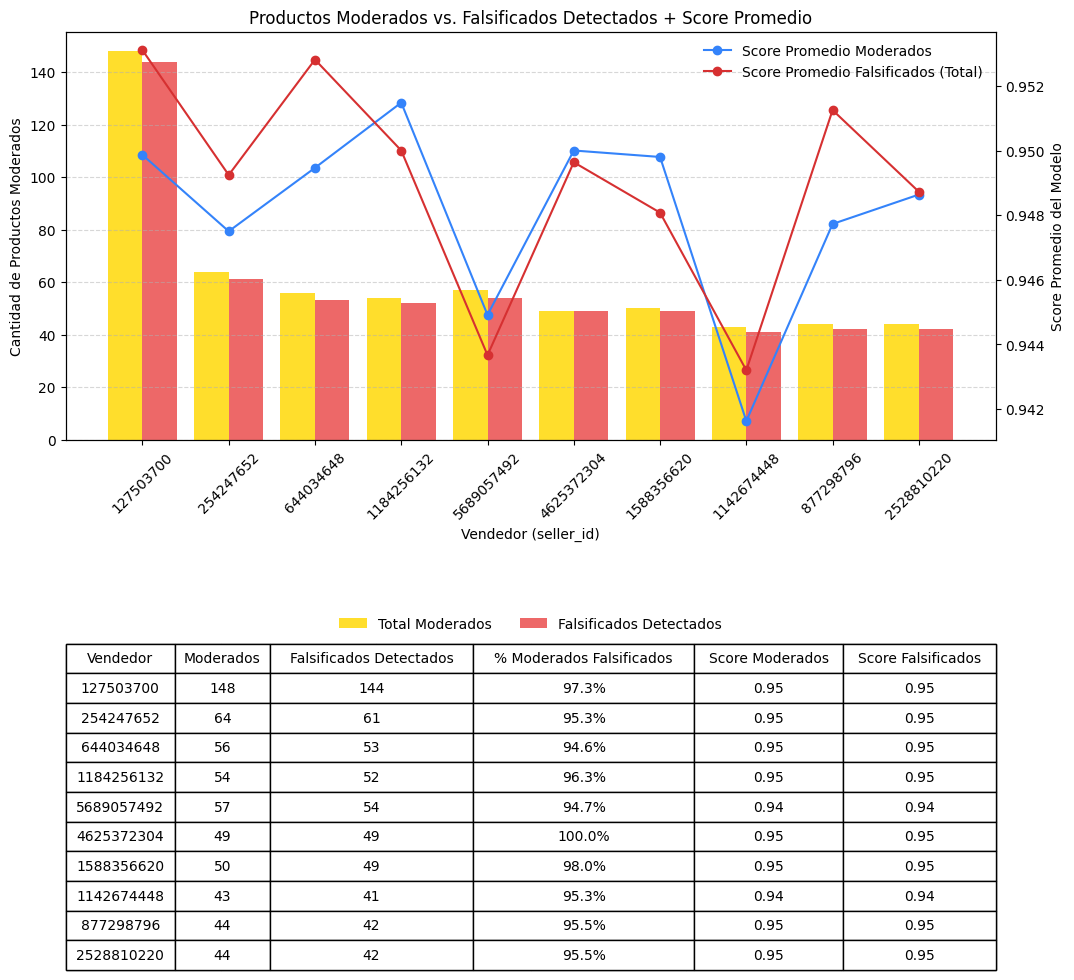

In [ ]:
# Calcular m√©tricas de moderaci√≥n y score por vendedor
sellers_moderacion = df.groupby("seller_id").agg(
    Productos_Moderados=("Moderado", "sum"),
    Falsificados_Detectados=("Fake", lambda x: sum(x & df.loc[x.index, "Moderado"])),  # Falsos detectados tras moderaci√≥n
    Score_Promedio_Moderados=("Score", lambda x: np.mean(x[df.loc[x.index, "Moderado"]])),
    Score_Promedio_Falsificados_Detectados=("Score", lambda x: np.mean(x[x.index & df.loc[x.index, "Fake"] & df.loc[x.index, "Moderado"]])),
    Score_Promedio_Falsificados_Total=("Score", lambda x: np.mean(x[df.loc[x.index, "Fake"]]))  # Score de TODOS los falsificados
)

# Calcular proporci√≥n de falsificados sobre los moderados
sellers_moderacion["% Moderados Falsificados"] = (sellers_moderacion["Falsificados_Detectados"] / sellers_moderacion["Productos_Moderados"]) * 100

# Unir con el top 10 vendedores con m√°s falsificaciones
top_sellers_moderacion = sellers_moderacion.loc[top_sellers.index]


fig, ax1 = plt.subplots(figsize=(12, 6))


bar_width = 0.4
x = np.arange(len(top_sellers_moderacion.index))

ax1.bar(x - bar_width/2, top_sellers_moderacion["Productos_Moderados"], bar_width, color="#FFDB15", alpha=0.9, label="Total Moderados")
ax1.bar(x + bar_width/2, top_sellers_moderacion["Falsificados_Detectados"], bar_width, color="#EB5757", alpha=0.9, label="Falsificados Detectados")

ax1.set_xlabel("Vendedor (seller_id)")
ax1.set_ylabel("Cantidad de Productos Moderados")
ax1.set_title("Productos Moderados vs. Falsificados Detectados + Score Promedio")
ax1.set_xticks(x)
ax1.set_xticklabels(top_sellers_moderacion.index, rotation=45)
ax1.legend(loc="lower center", bbox_to_anchor=(0.5, -0.5), ncol=2, frameon=False)
ax2 = ax1.twinx()
ax2.plot(x, top_sellers_moderacion["Score_Promedio_Moderados"], marker="o", linestyle="-", color="#3483FA", label="Score Promedio Moderados")
ax2.plot(x, top_sellers_moderacion["Score_Promedio_Falsificados_Total"], marker="o", linestyle="-", color="#D63031", label="Score Promedio Falsificados (Total)")
ax2.set_ylabel("Score Promedio del Modelo")

ax2.legend(loc="upper right", frameon=False)

ax1.grid(axis="y", linestyle="--", alpha=0.5)
table_data = []
for i, seller in enumerate(top_sellers_moderacion.index):
    moderados = top_sellers_moderacion["Productos_Moderados"].iloc[i]
    falsificados_detectados = top_sellers_moderacion["Falsificados_Detectados"].iloc[i]
    porcentaje_falsos = top_sellers_moderacion["% Moderados Falsificados"].iloc[i]
    score_moderados = top_sellers_moderacion["Score_Promedio_Moderados"].iloc[i]
    score_falsificados_detectados = top_sellers_moderacion["Score_Promedio_Falsificados_Detectados"].iloc[i]
    score_falsificados_total = top_sellers_moderacion["Score_Promedio_Falsificados_Total"].iloc[i]

    table_data.append([
        str(seller),
        f"{moderados}",
        f"{falsificados_detectados}",
        f"{porcentaje_falsos:.1f}%",
        f"{score_moderados:.2f}",
        f"{score_falsificados_total:.2f}"
    ])

table = plt.table(cellText=table_data,
                  colLabels=["Vendedor", "Moderados", "Falsificados Detectados", "% Moderados Falsificados", "Score Promedio Moderados", "Score Promedio Falsificados"],
                  cellLoc="center", loc="bottom", bbox=[0, -1.3, 1, 0.8])
num_columnas = len(table_data[0])
table = plt.table(cellText=table_data,
                  colLabels=["Vendedor", "Moderados", "Falsificados Detectados", "% Moderados Falsificados", "Score Moderados", "Score Falsificados"],
                  cellLoc="center", loc="bottom", bbox=[0, -1.3, 1, 0.8])

table.auto_set_font_size(False)
table.set_fontsize(12)


for cell in table.get_celld().values():
    cell.set_fontsize(10)  #

for i in range(num_columnas):
    table.auto_set_column_width([i])

# Ajustar la distancia entre la tabla y el gr√°fico
plt.subplots_adjust(bottom=0.2)
plt.show()






- El Score Promedio de los productos moderados (l√≠nea azul) es similar al de los falsificados en general (l√≠nea roja).
- En la mayor√≠a de los casos, los productos falsificados detectados ten√≠an un score de 0.95 o m√°s, lo que indica que el modelo de detecci√≥n est√° funcionando correctamente.
-El vendedor 5689057492 tiene el Score Promedio m√°s bajo para los falsificados (~0.94), lo que podr√≠a significar que sus productos falsos son m√°s dif√≠ciles de detectar.

#  1.2.9 Las marcas y su relaci√≥n con la falsificaci√≥n

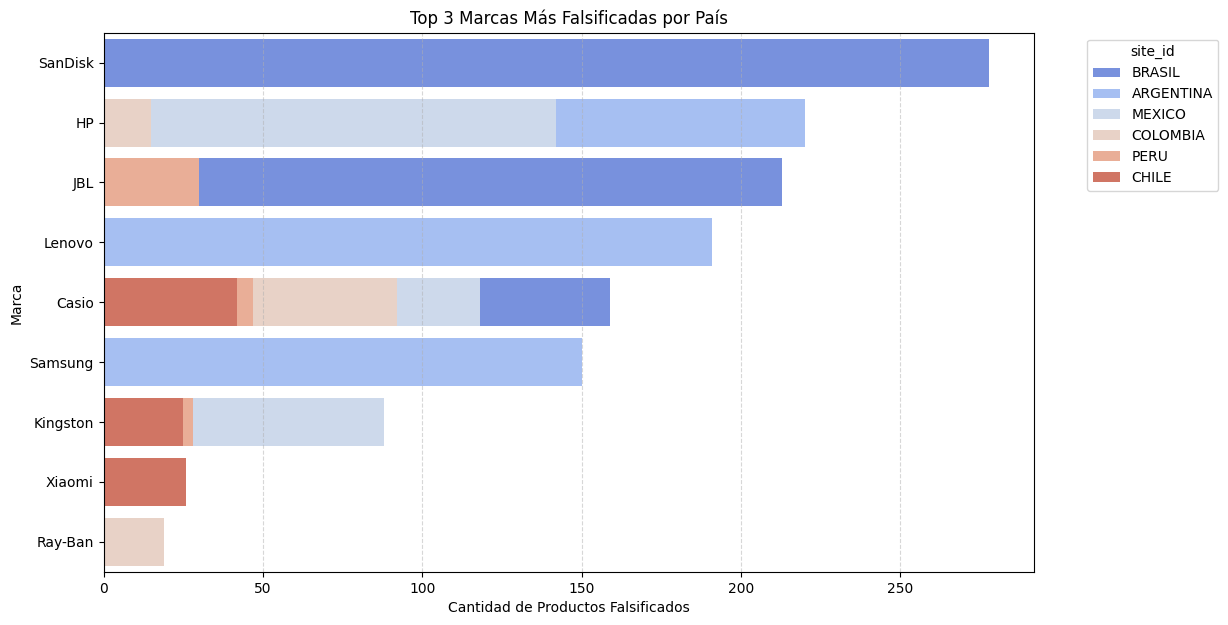

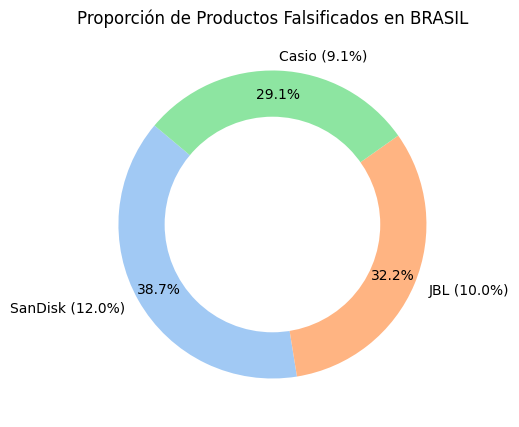

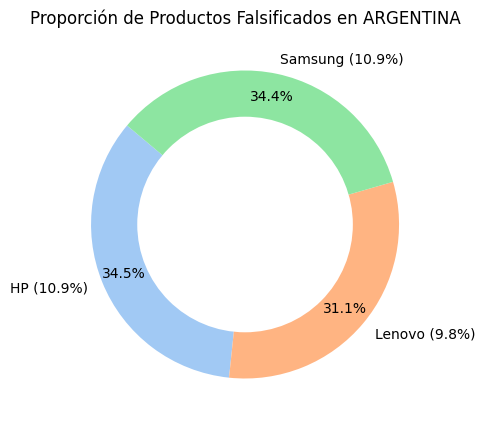

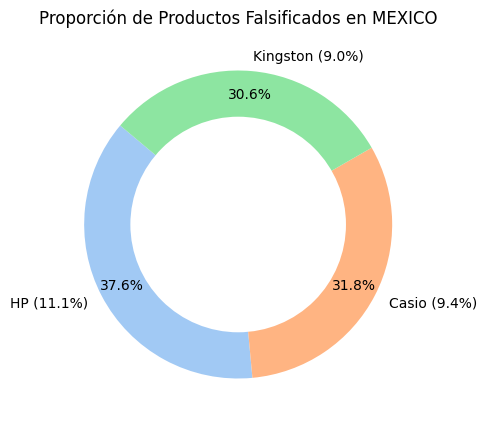

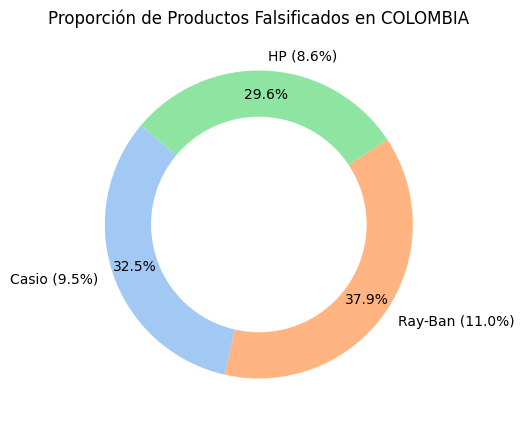

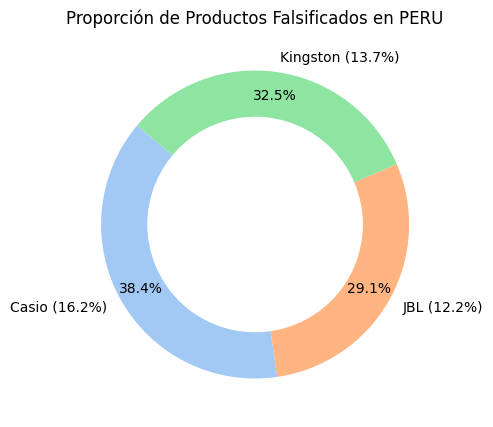

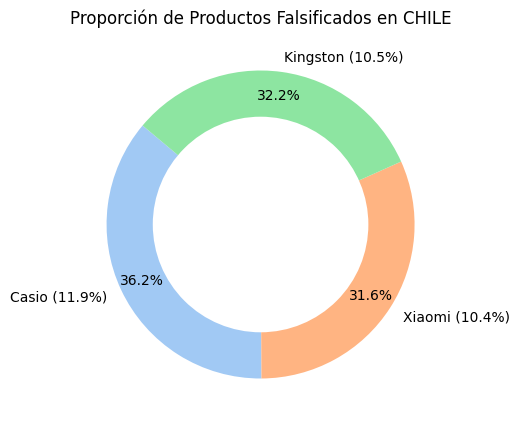

In [ ]:

if {"site_id", "Marca", "Fake"}.issubset(df.columns):
    df_falsificados = df[df["Fake"] == True]
    top_marcas_por_site = (
        df_falsificados.groupby(["site_id", "Marca"])
        .size()
        .reset_index(name="Conteo_Falsificados")
    )
    top_marcas_por_site = (
        top_marcas_por_site.sort_values(["site_id", "Conteo_Falsificados"], ascending=[True, False])
        .groupby("site_id")
        .head(3)
    )

    total_por_marca_site = df.groupby(["site_id", "Marca"]).size().reset_index(name="Total_Productos")
    df_merged = pd.merge(top_marcas_por_site, total_por_marca_site, on=["site_id", "Marca"])
    df_merged["Porcentaje_Falsificados"] = (df_merged["Conteo_Falsificados"] / df_merged["Total_Productos"]) * 100
    df_merged = df_merged.sort_values("Conteo_Falsificados", ascending=False)
    plt.figure(figsize=(12, 7))
    sns.barplot(
        data=df_merged,
        x="Conteo_Falsificados",
        y="Marca",
        hue="site_id",
        palette="coolwarm",
        dodge=False
    )

    plt.title("Top 3 Marcas M√°s Falsificadas por Pa√≠s")
    plt.xlabel("Cantidad de Productos Falsificados")
    plt.ylabel("Marca")
    plt.legend(title="site_id", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis="x", linestyle="--", alpha=0.5)


    plt.show()

    for site in df_merged["site_id"].unique():
        df_site = df_merged[df_merged["site_id"] == site]
        fig, ax = plt.subplots(figsize=(8, 5))

        labels = [f"{marca} ({pct:.1f}%)" for marca, pct in zip(df_site["Marca"], df_site["Porcentaje_Falsificados"])]
        wedges, texts, autotexts = ax.pie(
            df_site["Porcentaje_Falsificados"],
            labels=labels,
            autopct='%1.1f%%',
            pctdistance=0.85,
            startangle=140,
            colors=sns.color_palette("pastel")
        )
        centre_circle = plt.Circle((0, 0), 0.70, fc='white')
        fig.gca().add_artist(centre_circle)
        for text in texts + autotexts:
            text.set_fontsize(10)

        plt.title(f"Proporci√≥n de Productos Falsificados en {site}")
        plt.show()

else:
    print("No se encontraron las columnas necesarias en el DataFrame.")



**SanDisk domina el ranking de falsificaciones**

Es la marca m√°s falsificada en casi todos los pa√≠ses, con un volumen superior a 250 productos.
Destaca principalmente en Brasil y Argentina, donde el n√∫mero de falsificaciones es mayor.
 **HP y JBL tambi√©n est√°n altamente falsificadas**

HP es falsificada sobre todo en Argentina y M√©xico, lo que sugiere problemas con productos tecnol√≥gicos falsificados en estos mercados.
JBL tiene una fuerte presencia de falsificaciones en varios pa√≠ses, posiblemente debido a la alta demanda de aud√≠fonos y bocinas econ√≥micas.

**Lenovo y Samsung aparecen en el top**

Lenovo tiene presencia en Brasil, Argentina y M√©xico, lo que indica que los productos de computaci√≥n tambi√©n est√°n siendo falsificados.
Samsung tiene un volumen alto de falsificaciones, lo que puede estar relacionado con la popularidad de sus dispositivos electr√≥nicos.

**Casio, Kingston y Xiaomi son objetivos espec√≠ficos en algunos pa√≠ses**

Casio aparece especialmente falsificado en Chile y Colombia, lo que sugiere una mayor vulnerabilidad de la marca en esos mercados.
Xiaomi est√° en el top de falsificaciones en algunos pa√≠ses, lo cual indica que los dispositivos de esta marca, conocidos por su relaci√≥n calidad-precio, son replicados en el mercado.
Kingston, al igual que SanDisk, sugiere que los accesorios de almacenamiento son altamente susceptibles a falsificaci√≥n.

**Ray-Ban es la √∫nica marca de moda que aparece en el ranking**

Indica que los productos de lujo/accesorios como gafas de sol tambi√©n son falsificados principalmente en Colombia, aunque en menor volumen que los productos tecnol√≥gicos.

### 1.2.10 Cantidad de productos, moderados y falsificados por marca

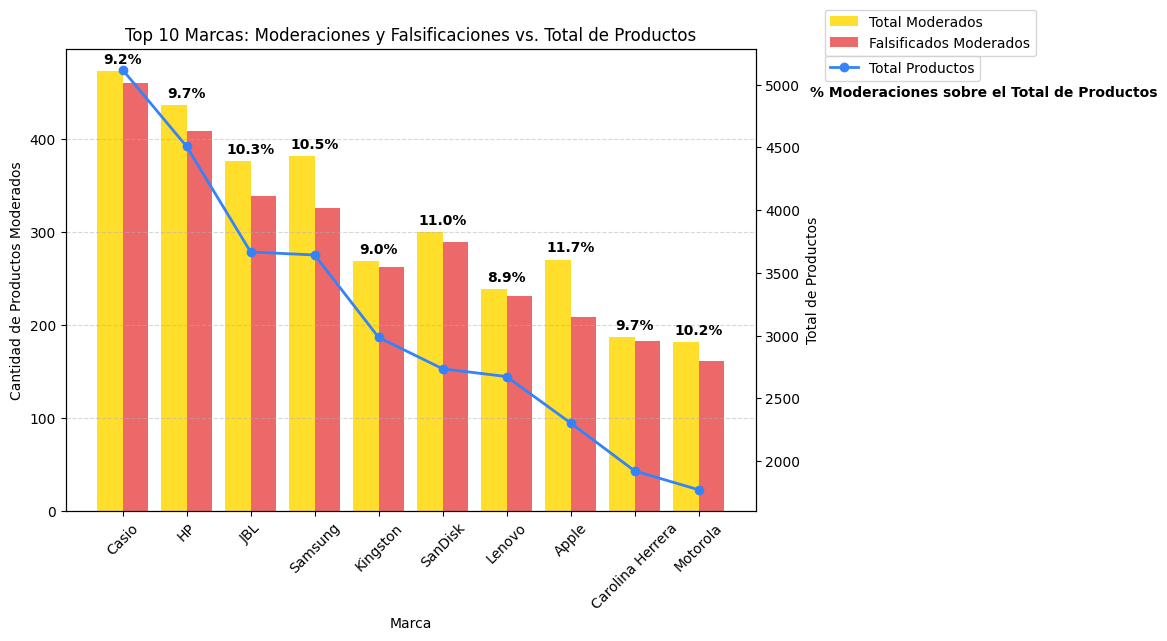

In [ ]:

marcas_moderadas = df.groupby("Marca").agg(
    Total_Productos=("Fake", "count"),
    Moderados=("Moderado", "sum"),
    Falsificados=("Fake", lambda x: sum(x & df.loc[x.index, "Moderado"]))
).sort_values(by="Total_Productos", ascending=False).head(10)


marcas_moderadas["% Moderados"] = (marcas_moderadas["Moderados"] / marcas_moderadas["Total_Productos"]) * 100


fig, ax1 = plt.subplots(figsize=(12, 6))
bar_width = 0.4
x = np.arange(len(marcas_moderadas.index))


ax1.bar(x - bar_width/2, marcas_moderadas["Moderados"], bar_width, color="#FFDB15", alpha=0.9, label="Total Moderados")
ax1.bar(x + bar_width/2, marcas_moderadas["Falsificados"], bar_width, color="#EB5757", alpha=0.9, label="Falsificados Moderados")
ax1.set_xlabel("Marca")
ax1.set_ylabel("Cantidad de Productos Moderados")
ax1.set_title("Top 10 Marcas: Moderaciones y Falsificaciones vs. Total de Productos")
ax1.set_xticks(x)
ax1.set_xticklabels(marcas_moderadas.index, rotation=45)
ax2 = ax1.twinx()
ax2.plot(x, marcas_moderadas["Total_Productos"], marker="o", linestyle="-", color="#3483FA", label="Total Productos", linewidth=2)
ax2.set_ylabel("Total de Productos")
ax1.legend(loc="upper left", bbox_to_anchor=(1.09, 1.1))
ax2.legend(loc="upper left", bbox_to_anchor=(1.09, 1))


for i in range(len(x)):
    porcentaje_moderado = marcas_moderadas["% Moderados"].iloc[i]
    ax1.text(x[i], marcas_moderadas["Moderados"].iloc[i] + 5, f"{porcentaje_moderado:.1f}%",
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')


plt.figtext(0.89, 0.8, "% Moderaciones sobre el Total de Productos", ha="center", fontsize=10, fontweight="bold", color="black")
ax1.grid(axis="y", linestyle="--", alpha=0.5)
plt.subplots_adjust(right=0.7)
plt.show()





- Casio y HP tienen los mayores vol√∫menes de moderaci√≥n absoluta (m√°s de 400 productos cada una), lo que indica que son marcas altamente vigiladas.
-El hecho de que las falsificaciones moderadas casi igualen a las moderaciones totales sugiere que la moderaci√≥n est√° funcionando bien en estas marcas, identificando los productos correctos para revisi√≥n.
- Sin embargo, esto tambi√©n puede significar que la moderaci√≥n est√° actuando de manera reactiva y no preventiva, es decir, que la detecci√≥n ocurre solo despu√©s de que un producto sospechoso ya ha sido publicado.
- Para marcas como Apple, Samsung y JBL el sistema de moderaci√≥n podr√≠a estar aplicando reglas demasiado estrictas para estas marcas, marcando productos leg√≠timos como sospechosos.
- Para marcas como Apple, Samsung y JBL los vendedores pueden estar usando estrategias que los hacen parecer m√°s sospechosos (por ejemplo, precios bajos, descripciones gen√©ricas, cambios de nombres sutiles).
-Los falsificadores en estas marcas (Apple, Samsung y JBL) pueden estar sofisticando sus m√©todos, usando im√°genes originales, packaging realista y mejores t√°cticas para evitar ser detectados.

**Notas**

- Si se est√° moderando en exceso productos leg√≠timos de Samsung, Apple y JBL, los vendedores aut√©nticos pueden enfrentar problemas operativos, retrasos y p√©rdida de confianza en la plataforma.
- Si los falsificadores han encontrado formas de evadir la detecci√≥n tras la moderaci√≥n, esto significa que se necesita una actualizaci√≥n de los algoritmos de detecci√≥n.
- Es posible que el modelo de detecci√≥n actual haya sido entrenado con sesgos, detectando mejor falsificaciones de otras marcas mientras deja pasar algunas en Samsung, Apple y JBL.




### 1.2.11 Top 10 Marcas con mayor cantidad de Rollbacks

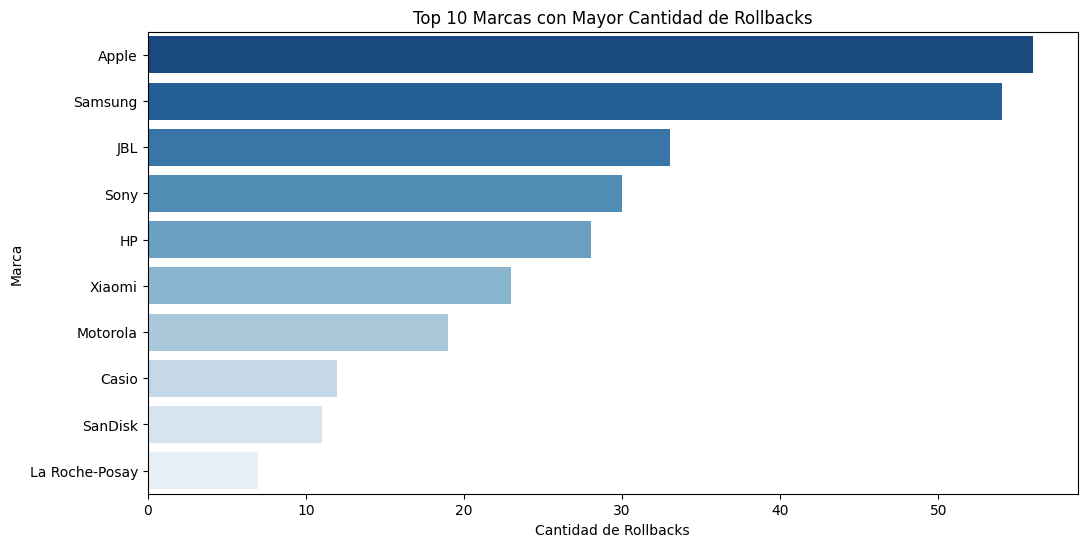

In [ ]:
rollback_por_marca = df.groupby("Marca")["Rollback"].sum().sort_values(ascending=False).head(10).reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(data=rollback_por_marca, x="Rollback", y="Marca", hue="Marca", dodge=False, palette="Blues_r", legend=False)


plt.xlabel("Cantidad de Rollbacks")
plt.ylabel("Marca")
plt.title("Top 10 Marcas con Mayor Cantidad de Rollbacks")
plt.show()


- Apple y Samsung lideran la lista de rollbacks, lo que indica que una gran cantidad de productos de estas marcas fueron moderados y luego revertidos.
- JBL, Sony y HP tambi√©n presentan una cantidad considerable de rollbacks, aunque en menor medida que Apple y Samsung.
- Casio y SanDisk, que en an√°lisis previos ten√≠an una alta detecci√≥n de falsificaciones, tienen menos rollbacks, lo que sugiere que la moderaci√≥n en estas marcas es m√°s efectiva.
- La Roche-Posay aparece en el ranking, lo que indica que incluso productos en la categor√≠a de cosm√©tica est√°n experimentando reversi√≥n de moderaciones.

**En marcas con menos rollbacks (Casio, SanDisk), la moderaci√≥n parece ser m√°s precisa, lo que indica que el modelo de detecci√≥n est√° funcionando mejor para ellas.**

- Sony no suele estar entre las marcas con m√°s falsificaciones detectadas, lo que sugiere que sus moderaciones pueden estar generando falsos positivos.

### 1.2.12 Tasa de rollback vs Falsificaciones por marca

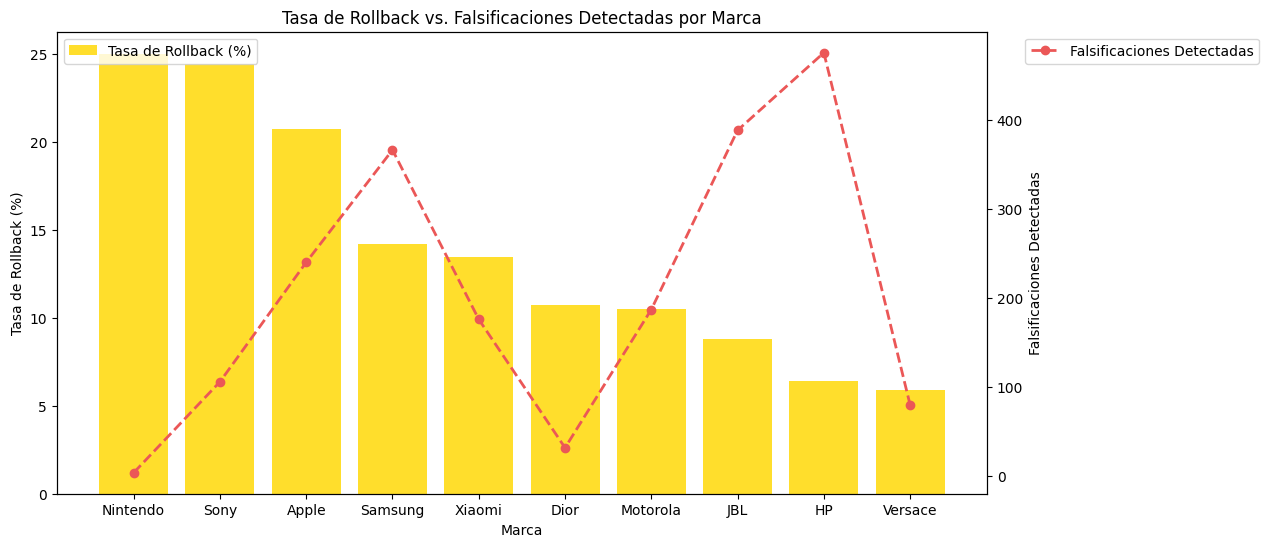

In [ ]:

# Calcular porcentaje de rollback sobre total de moderaciones
df["Rollback_Tasa"] = df["Rollback"] / df["Moderado"]
rollback_vs_falsificacion = df.groupby("Marca").agg(
    Rollback_Tasa=("Rollback_Tasa", "mean"),
    Falsificaciones=("Fake", "sum")
).sort_values(by="Rollback_Tasa", ascending=False).head(10)


fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(rollback_vs_falsificacion.index, rollback_vs_falsificacion["Rollback_Tasa"] * 100,
        color="#FFDB15", alpha=0.9, label="Tasa de Rollback (%)")

ax2 = ax1.twinx()
ax2.plot(rollback_vs_falsificacion.index, rollback_vs_falsificacion["Falsificaciones"],
         marker="o", linestyle="dashed", color="#EB5757", label="Falsificaciones Detectadas", linewidth=2)

# Etiquetas
ax1.set_xlabel("Marca")
ax1.set_ylabel("Tasa de Rollback (%)")
ax1.set_title("Tasa de Rollback vs. Falsificaciones Detectadas por Marca")
ax2.set_ylabel("Falsificaciones Detectadas")
ax1.legend(loc="upper left")

ax2.legend(loc="upper right", bbox_to_anchor=(1.3, 1))

plt.show()


- La moderaci√≥n puede estar aplic√°ndose de manera m√°s estricta en Nintendo, Dior y Versace, generando falsos positivos que luego deben ser revertidos.

- Los vendedores de estas marcas pueden estar apelando activamente las moderaciones y logrando que sus productos sean restaurados.

- En marcas con baja tasa de rollback como HP y JBL, la moderaci√≥n parece ser m√°s precisa y efectiva.

- Versace tiene pocas falsificaciones detectadas pero una tasa de rollback relativamente baja (~5%), lo que sugiere que la moderaci√≥n en esta marca est√° funcionando bien.

- Motorola tiene una tasa de rollback media (~10%), pero una cantidad elevada de falsificaciones detectadas.
-  La detecci√≥n de falsificaciones en HP y JBL es m√°s efectiva, por lo que hay menos necesidad de reversiones.
- Sony y Nintendo tienen altas tasas de rollback pero bajas falsificaciones detectadas, lo que sugiere que la moderaci√≥n en estas marcas puede ser demasiado estricta y generar falsos positivos.

- A diferencia de otras marcas como Apple y Samsung, los vendedores de HP y JBL no apelan tanto sus moderaciones o las apelaciones no tienen √©xito.


### 1.2.12 Vendedores con m√°s rollback y falsificaciones detectadas

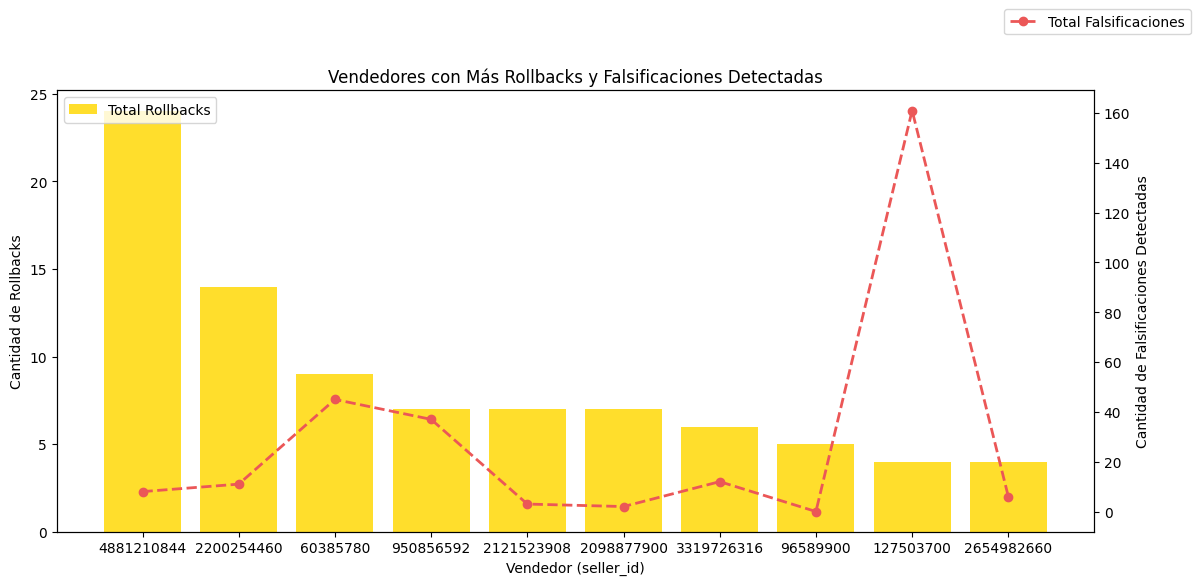

In [ ]:
vendedores_con_rollback = df.groupby("seller_id").agg(
    Total_Falsificados=("Fake", "sum"),
    Rollbacks=("Rollback", "sum")
).sort_values(by="Rollbacks", ascending=False).head(10)


fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(vendedores_con_rollback.index.astype(str), vendedores_con_rollback["Rollbacks"],
        color="#FFDB15", alpha=0.9, label="Total Rollbacks")

ax2 = ax1.twinx()
ax2.plot(vendedores_con_rollback.index.astype(str), vendedores_con_rollback["Total_Falsificados"],
         marker="o", linestyle="dashed", color="#EB5757", label="Total Falsificaciones", linewidth=2)


ax1.set_xlabel("Vendedor (seller_id)")
ax1.set_ylabel("Cantidad de Rollbacks")
ax1.set_title("Vendedores con M√°s Rollbacks y Falsificaciones Detectadas")
ax2.set_ylabel("Cantidad de Falsificaciones Detectadas")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right", bbox_to_anchor=(1.1, 1.2))


plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


- El vendedor con m√°s rollbacks (4881210844) tiene m√°s de 20 productos revertidos, pero relativamente pocas falsificaciones detectadas.
- El vendedor 127503700 tiene un pico extremadamente alto de falsificaciones detectadas (~150), pero no tiene tantos rollbacks comparado con otros.
- Algunos vendedores con muchos rollbacks (2200254460, 60385780, 95085692) tambi√©n tienen un n√∫mero considerable de falsificaciones detectadas, lo que sugiere que podr√≠an estar apelando productos falsificados y obteniendo reversi√≥n de moderaciones.
- Vendedores como 96589900 tienen rollbacks moderados, pero pocas falsificaciones detectadas, lo que podr√≠a indicar moderaciones incorrectas.

# 1.2.13 An√°lisis por pa√≠ses

### 1.2.14 Distribuci√≥n de Moderaciones y falsificaciones por pa√≠s

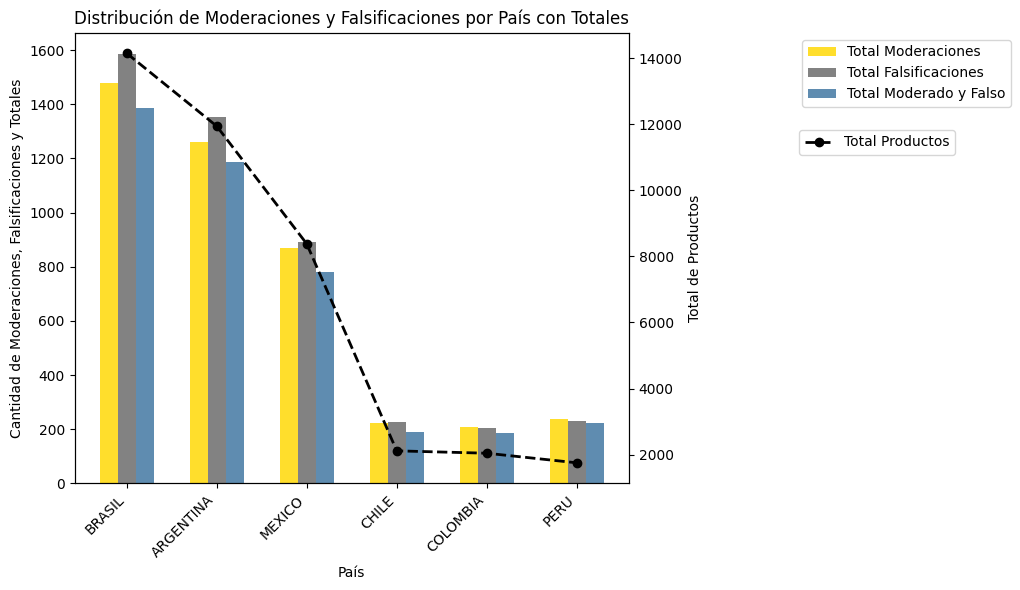

In [ ]:

df["Moderado"] = df["Moderado"].astype(int)
df["Fake"] = df["Fake"].astype(int)


df["Totales"] = ((df["Moderado"] == 1) & (df["Fake"] == 1)).astype(int)
distribucion_pais_top = df.groupby("site_id").agg(
    Total_Productos=("site_id", "count"),
    Total_Moderaciones=("Moderado", "sum"),
    Total_Falsificaciones=("Fake", "sum"),
    Total_Moderado_Falso=("Totales", "sum")
).sort_values(by="Total_Productos", ascending=False)


fig, ax1 = plt.subplots(figsize=(12, 6))

bar_width = 0.2
x = np.arange(len(distribucion_pais_top.index))

ax1.bar(x - bar_width, distribucion_pais_top["Total_Moderaciones"], bar_width, label="Total Moderaciones", color="#FFDB15", alpha=0.9)
ax1.bar(x, distribucion_pais_top["Total_Falsificaciones"], bar_width, label="Total Falsificaciones", color="#757575", alpha=0.9)
ax1.bar(x + bar_width, distribucion_pais_top["Total_Moderado_Falso"], bar_width, label="Total Moderado y Falso", color="#4d80a8", alpha=0.9)


ax2 = ax1.twinx()
ax2.plot(x, distribucion_pais_top["Total_Productos"], marker="o", linestyle="dashed", color="#000000", label="Total Productos", linewidth=2)


ax1.set_xlabel("Pa√≠s")
ax1.set_ylabel("Cantidad de Moderaciones, Falsificaciones y Totales")
ax1.set_title("Distribuci√≥n de Moderaciones y Falsificaciones por Pa√≠s con Totales")
ax2.set_ylabel("Total de Productos")
ax1.set_xticks(x)
ax1.set_xticklabels(distribucion_pais_top.index, rotation=45, ha="right")
ax1.legend(loc="upper left",bbox_to_anchor=(1.3, 1))
ax2.legend(loc="upper right", bbox_to_anchor=(1.6, 0.8))
plt.tight_layout()
plt.show()







- Brasil y Argentina lideran tanto en moderaciones como en falsificaciones.

- Brasil: 1.479 moderaciones y 1.585 falsificaciones.
- Argentina: 1.262 moderaciones y 1.352 falsificaciones.
Esto indica que en estos pa√≠ses se detectan muchas falsificaciones, pero tambi√©n hay mucha actividad de moderaci√≥n, lo que sugiere un mayor control del mercado.

- M√©xico sigue la misma tendencia, aunque con cifras m√°s bajas.
870 moderaciones y 892 falsificaciones.
La proporci√≥n sigue siendo alta, lo que sugiere que la detecci√≥n de productos falsos es similar a la cantidad de moderaciones.
- Chile, Colombia y Per√∫ tienen cifras mucho menores en volumen de moderaciones y falsificaciones.

Sin embargo, la relaci√≥n entre moderaciones y falsificaciones sigue siendo muy cercana.
Esto podr√≠a indicar que en estos pa√≠ses se est√°n detectando casi todas las falsificaciones, pero con un menor volumen de productos en general.

### Analizando el % de moderaciones sobre el total de productos, encontramos:

- Per√∫ lidera con 13,5% de moderaciones, lo que sugiere una mayor intervenci√≥n en los productos listados.
- Chile (10,4%) y Argentina (10,6%) tambi√©n tienen un alto porcentaje de moderaciones.
- Brasil (10,4%) y M√©xico (10,4%) est√°n en niveles similares.
- Colombia es el pa√≠s con menos moderaciones en proporci√≥n a los productos (10,2%).

Esto indica que en Per√∫ hay un mayor control sobre los productos listados, mientras que en Colombia el porcentaje de moderaciones es menor.

**Si analizamos el % de falsificaciones sobre el total de productos:**

- Brasil (11,2%) y Argentina (11,3%) tienen el mayor porcentaje de falsificaciones.
- M√©xico (10,6%) sigue la tendencia, aunque ligeramente m√°s bajo.
- Per√∫ (13,1%) tambi√©n muestra un alto porcentaje de falsificaciones.
- Colombia (10,0%) y Chile (10,6%) tienen el menor porcentaje relativo.

Este an√°lisis muestra que en Brasil y Argentina hay una gran cantidad de falsificaciones en proporci√≥n al total de productos, lo que podr√≠a ser un problema de volumen o un mercado m√°s atractivo para falsificadores.

**Tasa de Falsificaciones dentro de Moderaciones (%) = (Total de Falsificaciones Moderadas / Total de Moderaciones) * 100**

- Chile (85,5%) y Per√∫ (92,8%) tienen las tasas m√°s altas.

Esto sugiere que casi todas las moderaciones en estos pa√≠ses terminan en falsificaciones.
- Brasil (93,8%), Argentina (94,0%) y M√©xico (89,8%) tambi√©n tienen valores altos.
Indica que las moderaciones son bastante efectivas en detectar falsificaciones.
-Colombia tiene la tasa m√°s baja con 89,4%.

**Podr√≠a haber m√°s moderaciones que no detectan productos falsos.
En la mayor√≠a de los pa√≠ses, m√°s del 85% de los productos moderados terminan siendo falsificaciones, lo que sugiere un proceso de moderaci√≥n eficiente.**

### 1.2.15 Distribuci√≥n de vendedores por pa√≠s: Total productos, falsificadores y moderados

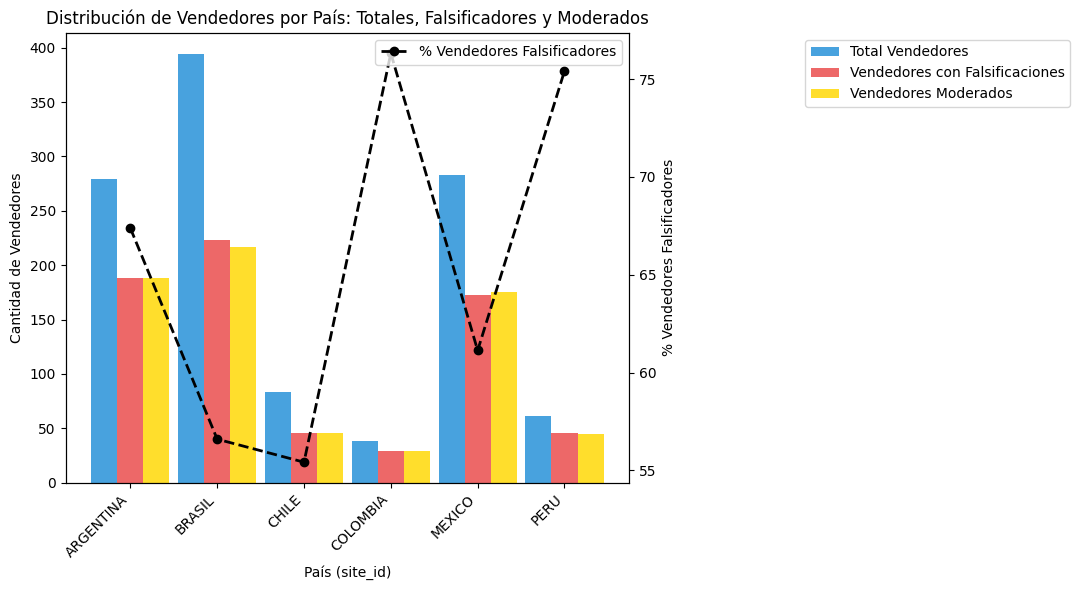

In [264]:

vendedores_pais = df.groupby("site_id").agg(
    Total_Vendedores=("seller_id", "nunique"),
    Vendedores_Falsificadores=("seller_id", lambda x: x[df.loc[x.index, "Fake"] == 1].nunique()),
    Vendedores_Moderados=("seller_id", lambda x: x[df.loc[x.index, "Moderado"] == 1].nunique())
).reset_index()


vendedores_pais["% Vendedores Falsificadores"] = (vendedores_pais["Vendedores_Falsificadores"] / vendedores_pais["Total_Vendedores"]) * 100
fig, ax1 = plt.subplots(figsize=(12, 6))

bar_width = 0.3
x = np.arange(len(vendedores_pais["site_id"]))
ax1.bar(x - bar_width, vendedores_pais["Total_Vendedores"], bar_width, label="Total Vendedores", color="#3498DB", alpha=0.9)
ax1.bar(x, vendedores_pais["Vendedores_Falsificadores"], bar_width, label="Vendedores con Falsificaciones", color="#EB5757", alpha=0.9)
ax1.bar(x + bar_width, vendedores_pais["Vendedores_Moderados"], bar_width, label="Vendedores Moderados", color="#FFDB15", alpha=0.9)

ax2 = ax1.twinx()
ax2.plot(x, vendedores_pais["% Vendedores Falsificadores"], marker="o", linestyle="dashed", color="black", label="% Vendedores Falsificadores", linewidth=2)
ax1.set_xlabel("Pa√≠s (site_id)")
ax1.set_ylabel("Cantidad de Vendedores")
ax1.set_title("Distribuci√≥n de Vendedores por Pa√≠s: Totales, Falsificadores y Moderados")
ax2.set_ylabel("% Vendedores Falsificadores")


ax1.set_xticks(x)
ax1.set_xticklabels(vendedores_pais["site_id"], rotation=45, ha="right")
ax1.legend(loc="upper left",bbox_to_anchor=(1.3, 1))
ax2.legend(loc="upper right")
plt.tight_layout()
plt.show()





In [266]:
vendedores_pais

site_id  Total_Vendedores  Vendedores_Falsificadores  \
0  ARGENTINA               279                        188   
1     BRASIL               394                        223   
2      CHILE                83                         46   
3   COLOMBIA                38                         29   
4     MEXICO               283                        173   
5       PERU                61                         46   

   Vendedores_Moderados  % Vendedores Falsificadores  
0                   188                        67.38  
1                   217                        56.60  
2                    46                        55.42  
3                    29                        76.32  
4                   175                        61.13  
5                    45                        75.41

- Brasil tiene la mayor cantidad de vendedores en total (394), seguido de M√©xico (283) y Argentina (279).
- Brasil tambi√©n tiene la mayor cantidad absoluta de vendedores con falsificaciones (223).
- Colombia y Per√∫ tienen pocos vendedores en total, pero un alto porcentaje de ellos ha vendido productos falsificados.

###Si analizamos el % de vendedores con falsificaciones sobre el total en cada pa√≠s:

- Colombia (76.3%) y Per√∫ (75.4%) tienen la mayor proporci√≥n de vendedores que han vendido productos falsos.
Esto indica que en estos pa√≠ses la probabilidad de que un vendedor est√© involucrado en falsificaciones es alta.
-Argentina (67.4%) y M√©xico (61.1%) tambi√©n presentan un problema significativo, con m√°s del 60% de sus vendedores en esta situaci√≥n.
-Brasil (56.6%) y Chile (55.4%) tienen la menor proporci√≥n de falsificadores en relaci√≥n con su total de vendedores, aunque sigue siendo preocupante.

En todos los pa√≠ses, la cantidad de vendedores moderados es similar a la cantidad de vendedores con falsificaciones.
Esto sugiere que la moderaci√≥n est√° funcionando bien para identificar vendedores problem√°ticos.
Brasil y M√©xico tienen ligeras diferencias entre moderaciones y falsificaciones, lo que puede indicar que hay vendedores que han sido moderados sin haber vendido productos falsos.

### 1.2.16 Top 10 Categorias con m√°s vendedores con productos falsificados por pa√≠s

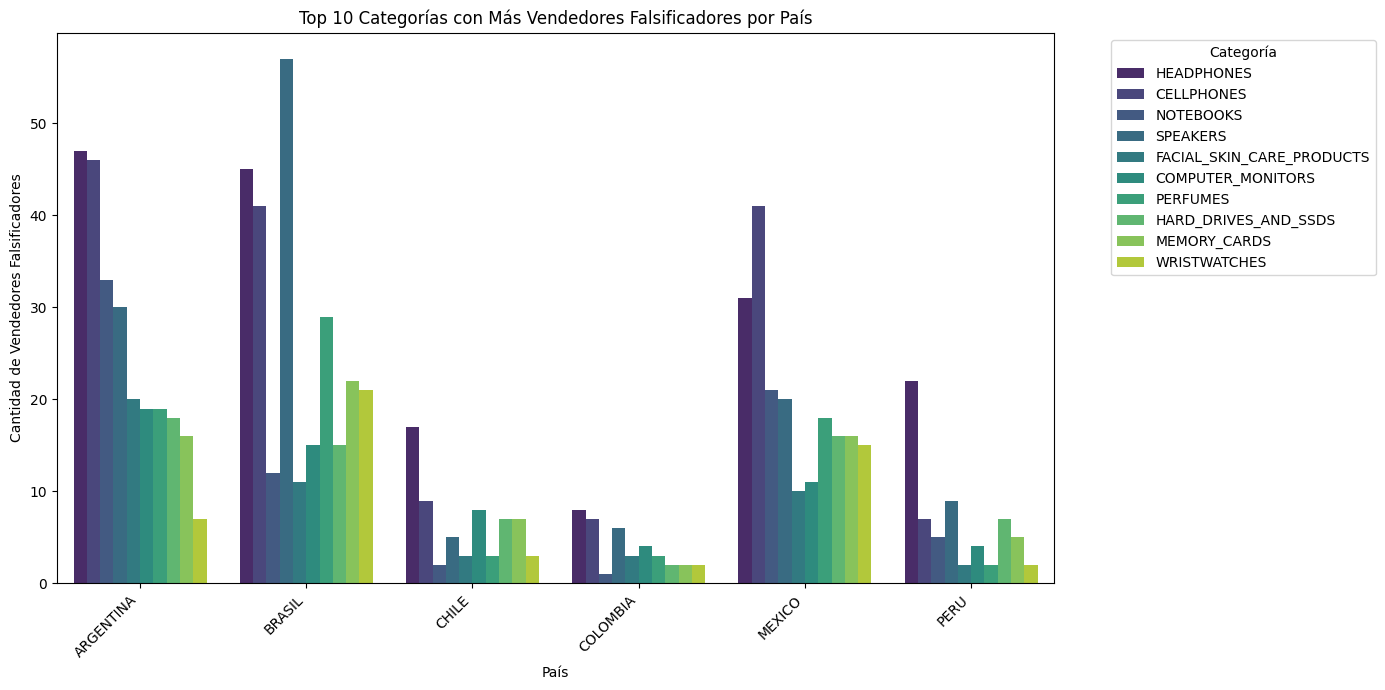

In [301]:
# Agrupar por pa√≠s y categor√≠a para ver la cantidad de vendedores con falsificaciones
categoria_pais_falsificaciones = df[df["Fake"] == 1].groupby(["site_id", "Dominio_normalizado"]).agg(
    Vendedores_Falsificadores=("seller_id", "nunique"),
    Total_Productos_Falsificados=("Fake", "sum")
).reset_index()

# Ordenar por pa√≠s y cantidad de vendedores falsificadores
categoria_pais_falsificaciones = categoria_pais_falsificaciones.sort_values(
    by=["site_id", "Vendedores_Falsificadores"], ascending=[True, False]
)

top_categorias = categoria_pais_falsificaciones.groupby("Dominio_normalizado")["Vendedores_Falsificadores"].sum().nlargest(10).index


df_top_categorias = categoria_pais_falsificaciones[categoria_pais_falsificaciones["Dominio_normalizado"].isin(top_categorias)]
plt.figure(figsize=(14, 7))
sns.barplot(
    data=df_top_categorias,
    x="site_id",
    y="Vendedores_Falsificadores",
    hue="Dominio_normalizado",
    palette="viridis"
)

plt.xlabel("Pa√≠s")
plt.ylabel("Cantidad de Vendedores Falsificadores")
plt.title("Top 10 Categor√≠as con M√°s Vendedores Falsificadores por Pa√≠s")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Categor√≠a", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




- Brasil, Argentina y M√©xico son los pa√≠ses con la mayor cantidad de vendedores falsificadores, lo que indica que estos mercados tienen una alta presencia de productos sospechosos.
- Chile, Colombia y Per√∫ muestran una menor cantidad de vendedores falsificadores en comparaci√≥n con los tres pa√≠ses anteriores, lo que sugiere que la presencia de productos falsificados es m√°s controlada o menos com√∫n.
Categor√≠as m√°s afectadas:

- CELLPHONES, HEADPHONES y NOTEBOOKS son las categor√≠as con la mayor cantidad de vendedores involucrados en falsificaciones en todos los pa√≠ses.
- SPEAKERS, PERFUMES y MEMORY_CARDS tambi√©n presentan una alta cantidad de vendedores falsificadores, aunque con menor incidencia en comparaci√≥n con las primeras tres categor√≠as.
- FAICAL_SKIN_CARE_PRODUCTS y COMPUTER_MONITORS aparecen en menor cantidad, lo que indica que la falsificaci√≥n en estas categor√≠as es menos frecuente.
Variabilidad entre pa√≠ses:

- En Brasil, los vendedores falsificadores est√°n m√°s concentrados en categor√≠as como SPEAKERS, CELLPHONES y NOTEBOOKS, lo que indica que estas categor√≠as podr√≠an tener una demanda alta o un control menos estricto.
- En Argentina y M√©xico, la distribuci√≥n es m√°s homog√©nea, pero sigue existiendo una fuerte presencia en CELLPHONES y HEADPHONES.
- En Colombia y Per√∫, aunque la cantidad de vendedores falsificadores es menor, se observa que HEADPHONES y MEMORY_CARDS tienen un impacto relativamente alto en relaci√≥n con el total de vendedores falsificadores.

### 1.2.17 Top 10 Categorias con m√°s vendedores con productos falsificados

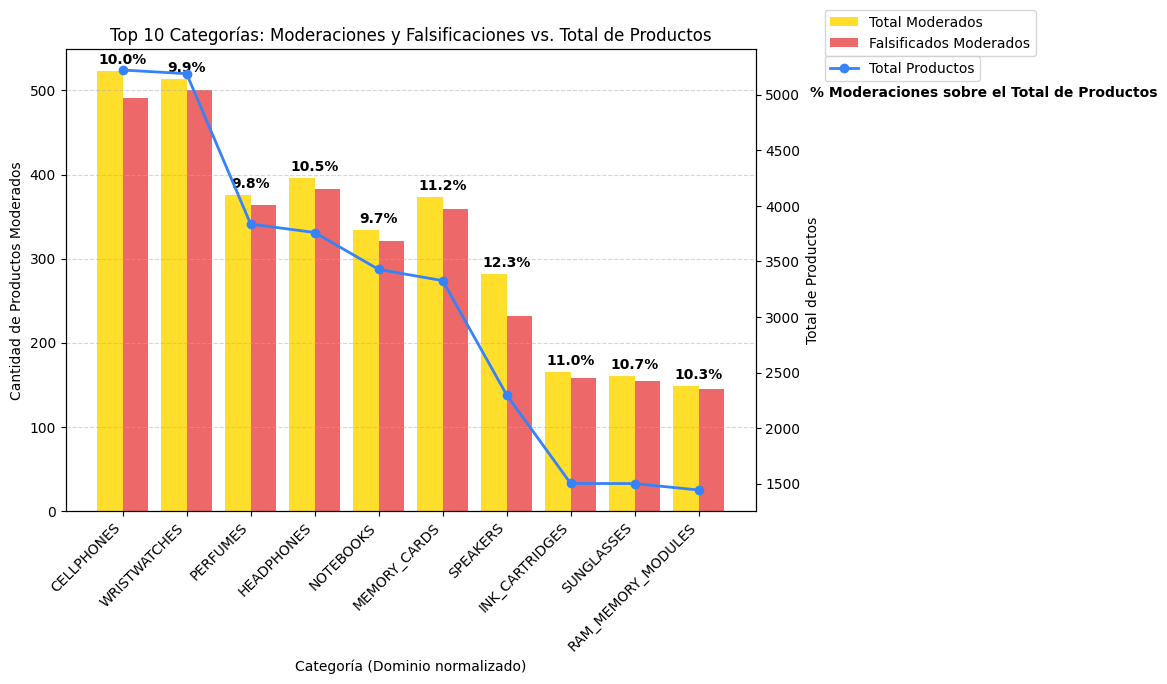

In [281]:

categorias_moderadas = df.groupby("Dominio_normalizado").agg(
    Total_Productos=("Fake", "count"),
    Moderados=("Moderado", "sum"),
    Falsificados=("Fake", lambda x: sum(x & df.loc[x.index, "Moderado"]))
).sort_values(by="Total_Productos", ascending=False).head(10)


categorias_moderadas["% Moderados"] = (categorias_moderadas["Moderados"] / categorias_moderadas["Total_Productos"]) * 100


fig, ax1 = plt.subplots(figsize=(12, 6))
bar_width = 0.4
x = np.arange(len(categorias_moderadas.index))


ax1.bar(x - bar_width/2, categorias_moderadas["Moderados"], bar_width, color="#FFDB15", alpha=0.9, label="Total Moderados")
ax1.bar(x + bar_width/2, categorias_moderadas["Falsificados"], bar_width, color="#EB5757", alpha=0.9, label="Falsificados Moderados")
ax1.set_xlabel("Categor√≠a (Dominio normalizado)")
ax1.set_ylabel("Cantidad de Productos Moderados")
ax1.set_title("Top 10 Categor√≠as: Moderaciones y Falsificaciones vs. Total de Productos")
ax1.set_xticks(x)
ax1.set_xticklabels(categorias_moderadas.index, rotation=45, ha="right")


ax2 = ax1.twinx()
ax2.plot(x, categorias_moderadas["Total_Productos"], marker="o", linestyle="-", color="#3483FA", label="Total Productos", linewidth=2)
ax2.set_ylabel("Total de Productos")
ax1.legend(loc="upper left", bbox_to_anchor=(1.09, 1.1))
ax2.legend(loc="upper left", bbox_to_anchor=(1.09, 1))
for i in range(len(x)):
    porcentaje_moderado = categorias_moderadas["% Moderados"].iloc[i]
    ax1.text(x[i], categorias_moderadas["Moderados"].iloc[i] + 5, f"{porcentaje_moderado:.1f}%",
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')


plt.figtext(0.89, 0.8, "% Moderaciones sobre el Total de Productos", ha="center", fontsize=10, fontweight="bold", color="black")


ax1.grid(axis="y", linestyle="--", alpha=0.5)


plt.subplots_adjust(right=0.7)
plt.show()





### 1.2.18 Reglas de atribuci√≥n a la falsificaci√≥n

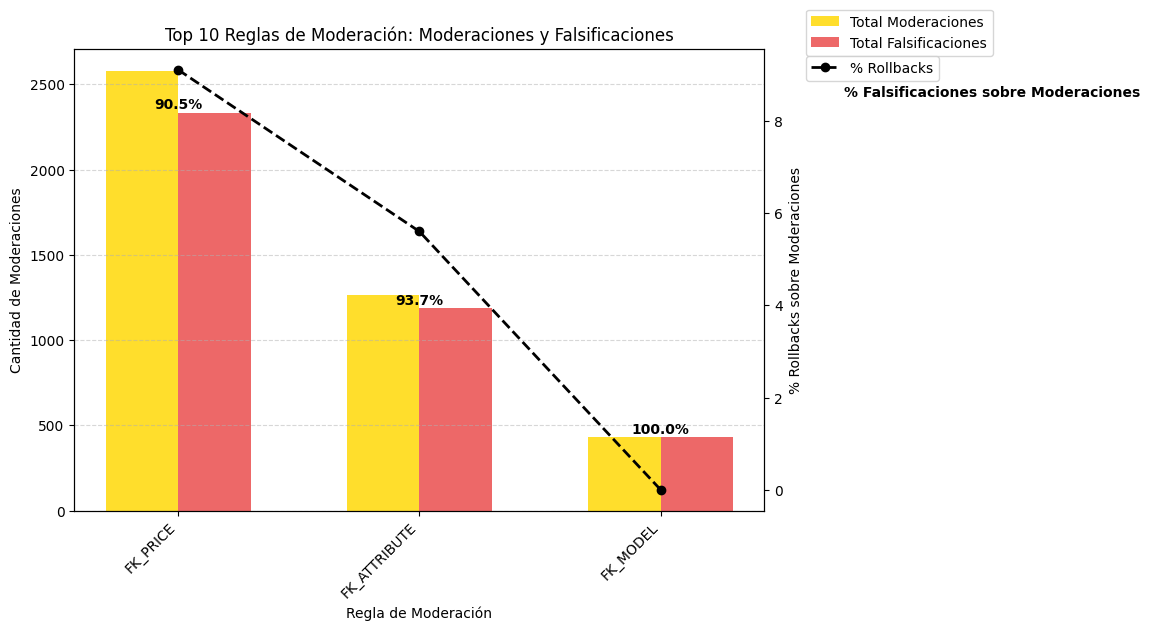

In [285]:

reglas_moderacion = df.groupby("Rule").agg(
    Total_Moderaciones=("Moderado", "sum"),
    Total_Falsificaciones=("Fake", "sum"),
    Total_Rollbacks=("Rollback", "sum")
).sort_values(by="Total_Moderaciones", ascending=False).head(3)


reglas_moderacion["% Falsificaciones"] = (reglas_moderacion["Total_Falsificaciones"] / reglas_moderacion["Total_Moderaciones"]) * 100

reglas_moderacion["% Rollbacks"] = (reglas_moderacion["Total_Rollbacks"] / reglas_moderacion["Total_Moderaciones"]) * 100
fig, ax1 = plt.subplots(figsize=(12, 6))
bar_width = 0.3
x = np.arange(len(reglas_moderacion.index))
ax1.bar(x - bar_width/2, reglas_moderacion["Total_Moderaciones"], bar_width, color="#FFDB15", alpha=0.9, label="Total Moderaciones")
ax1.bar(x + bar_width/2, reglas_moderacion["Total_Falsificaciones"], bar_width, color="#EB5757", alpha=0.9, label="Total Falsificaciones")


ax1.set_xlabel("Regla de Moderaci√≥n")
ax1.set_ylabel("Cantidad de Moderaciones")
ax1.set_title("Top 10 Reglas de Moderaci√≥n: Moderaciones y Falsificaciones")
ax1.set_xticks(x)
ax1.set_xticklabels(reglas_moderacion.index, rotation=45, ha="right")
ax2 = ax1.twinx()
ax2.plot(x, reglas_moderacion["% Rollbacks"], marker="o", linestyle="dashed", color="black", label="% Rollbacks", linewidth=2)
ax2.set_ylabel("% Rollbacks sobre Moderaciones")


ax1.legend(loc="upper left", bbox_to_anchor=(1.05, 1.1))
ax2.legend(loc="upper left", bbox_to_anchor=(1.05, 1))


for i in range(len(x)):
    porcentaje_falsif = reglas_moderacion["% Falsificaciones"].iloc[i]
    ax1.text(x[i], reglas_moderacion["Total_Falsificaciones"].iloc[i] + 5, f"{porcentaje_falsif:.1f}%",
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')


plt.figtext(0.89, 0.8, "% Falsificaciones sobre Moderaciones", ha="center", fontsize=10, fontweight="bold", color="black")
ax1.grid(axis="y", linestyle="--", alpha=0.5)
plt.subplots_adjust(right=0.7)
plt.show()




- La mayor√≠a de las moderaciones provienen de la regla FK_PRICE, con m√°s de 2,500 moderaciones.

- El 90.5% de estas moderaciones fueron confirmadas como falsificaciones.
Esto indica que la regla FK_PRICE es altamente efectiva en la detecci√≥n de productos falsificados.
- La regla FK_ATTRIBUTE tambi√©n tiene una tasa de falsificaci√≥n alta (93.7%), pero con un menor volumen de moderaciones.Es posible que esta regla est√© actuando sobre productos con caracter√≠sticas espec√≠ficas y no de forma masiva como FK_PRICE.

- La regla FK_MODEL tiene un 100% de falsificaciones confirmadas, pero con un volumen muy bajo de moderaciones.Esto sugiere que podr√≠a ser una regla m√°s restrictiva, activ√°ndose en casos muy espec√≠ficos.
Sin embargo, su precisi√≥n parece ser la mejor de las tres reglas analizadas.
-Los rollbacks son bajos para todas las reglas, con un m√°ximo de menos del 10% en FK_PRICE.Esto indica que la moderaci√≥n est√° siendo efectiva y que pocas moderaciones est√°n siendo revertidas por Atenci√≥n al Cliente.
Las reglas FK_ATTRIBUTE y FK_MODEL pr√°cticamente no tienen rollbacks, lo que refuerza su precisi√≥n.


### 1.2.19 Moderaciones y falsificaciones por regla por cada pa√≠s

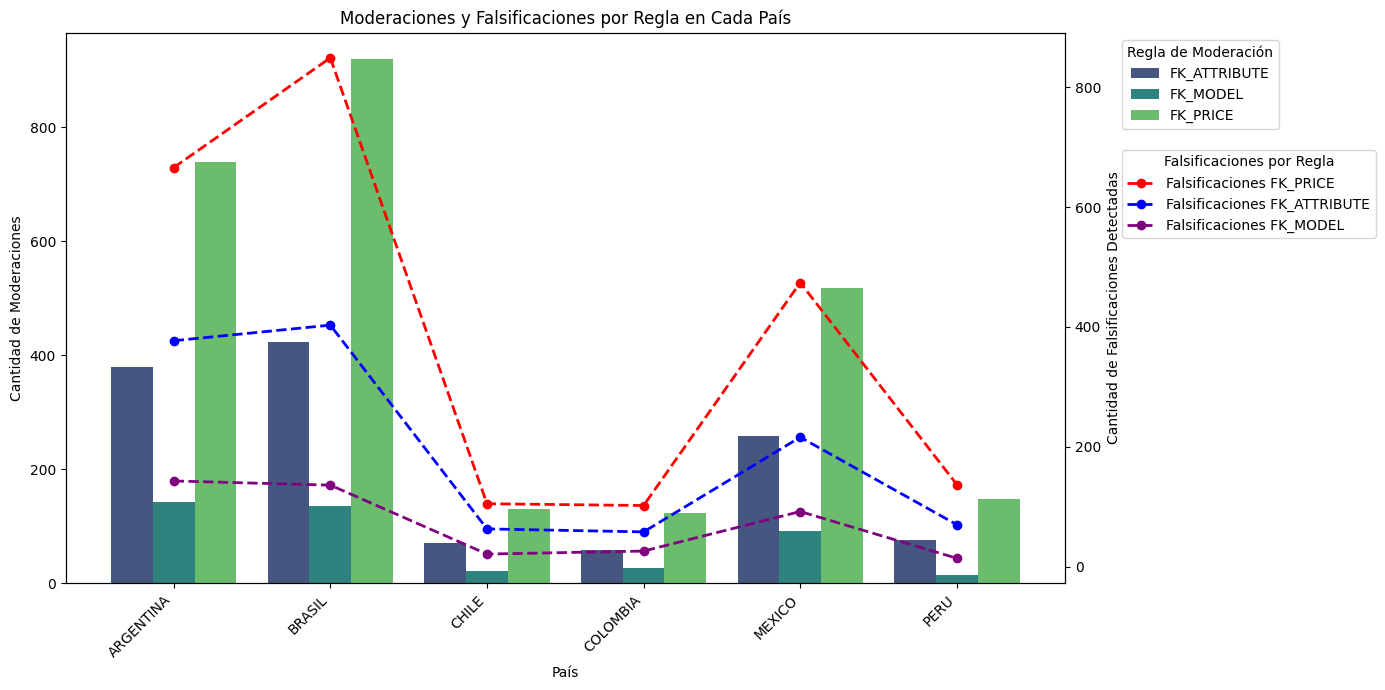

In [304]:
reglas_por_pais = df.groupby(["site_id", "Rule"]).agg(
    Total_Moderaciones=("Moderado", "sum"),
    Total_Falsificaciones=("Fake", "sum")
).reset_index()

reglas_top = ["FK_PRICE", "FK_ATTRIBUTE", "FK_MODEL"]
reglas_por_pais = reglas_por_pais[reglas_por_pais["Rule"].isin(reglas_top)]

# Obtener el orden correcto de los pa√≠ses
paises_ordenados = reglas_por_pais["site_id"].unique()


fig, ax1 = plt.subplots(figsize=(14, 7))
sns.barplot(
    data=reglas_por_pais,
    x="site_id",
    y="Total_Moderaciones",
    hue="Rule",
    palette="viridis",
    ax=ax1
)


ax1.set_xlabel("Pa√≠s")
ax1.set_ylabel("Cantidad de Moderaciones")
ax1.set_title("Moderaciones y Falsificaciones por Regla en Cada Pa√≠s")

# Asegurar que los ticks en el eje X coincidan con las etiquetas
ax1.set_xticks(np.arange(len(paises_ordenados)))
ax1.set_xticklabels(paises_ordenados, rotation=45, ha="right")


ax2 = ax1.twinx()
colores_reglas = {"FK_PRICE": "red", "FK_ATTRIBUTE": "blue", "FK_MODEL": "purple"}
for regla in reglas_top:
    datos_regla = reglas_por_pais[reglas_por_pais["Rule"] == regla]
    ax2.plot(
        np.arange(len(datos_regla["site_id"])), datos_regla["Total_Falsificaciones"],
        marker="o", linestyle="dashed", color=colores_reglas[regla],
        label=f"Falsificaciones {regla}", linewidth=2
    )


ax2.set_ylabel("Cantidad de Falsificaciones Detectadas")


ax1.legend(title="Regla de Moderaci√≥n", bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.legend(title="Falsificaciones por Regla", bbox_to_anchor=(1.05, 0.8), loc='upper left')
plt.tight_layout()
plt.show()



### 1.2.20 Moderaciones y falsificaciones por regla por cada categoria

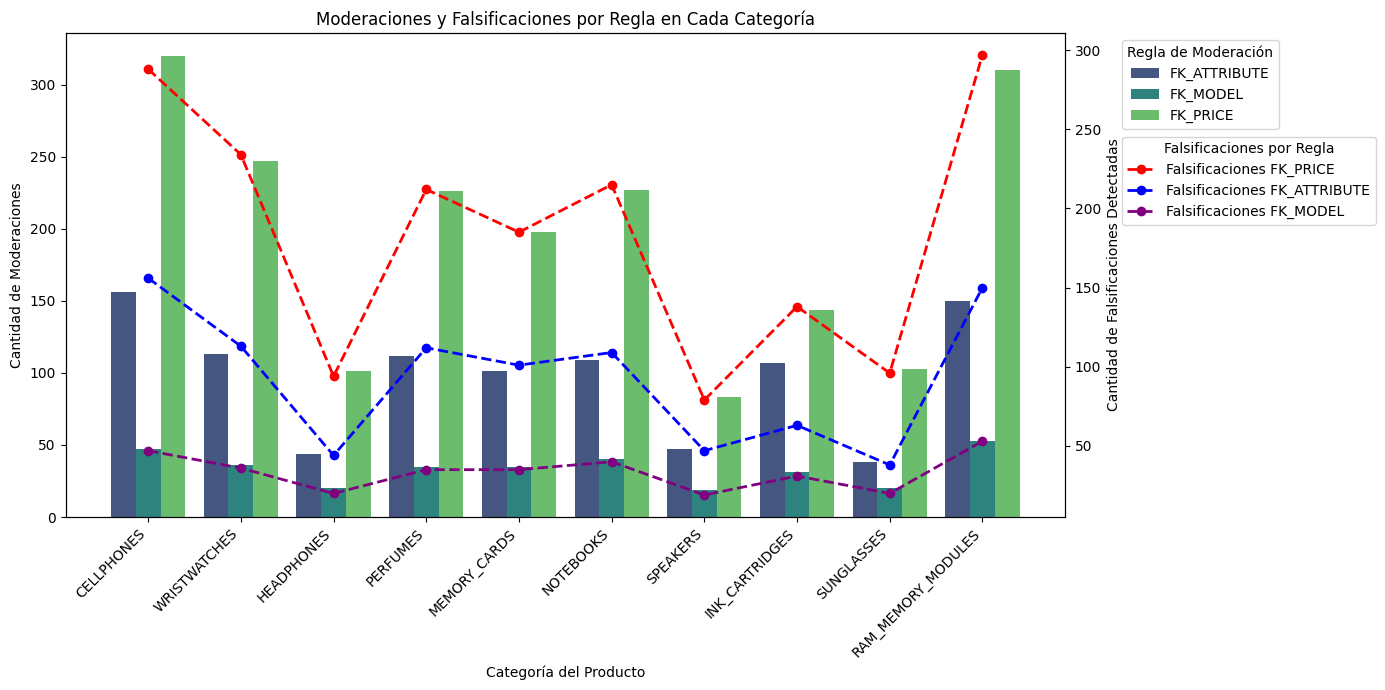

In [305]:


reglas_por_categoria = df.groupby(["Dominio_normalizado", "Rule"]).agg(
    Total_Moderaciones=("Moderado", "sum"),
    Total_Falsificaciones=("Fake", "sum")
).reset_index()

reglas_top = ["FK_PRICE", "FK_ATTRIBUTE", "FK_MODEL"]
reglas_por_categoria = reglas_por_categoria[reglas_por_categoria["Rule"].isin(reglas_top)]

# Seleccionar las 10 categor√≠as con m√°s moderaciones
top_categorias = reglas_por_categoria.groupby("Dominio_normalizado")["Total_Moderaciones"].sum().nlargest(10).index
reglas_por_categoria = reglas_por_categoria[reglas_por_categoria["Dominio_normalizado"].isin(top_categorias)]


fig, ax1 = plt.subplots(figsize=(14, 7))
sns.barplot(
    data=reglas_por_categoria,
    x="Dominio_normalizado",
    y="Total_Moderaciones",
    hue="Rule",
    palette="viridis",
    ax=ax1
)

ax1.set_xlabel("Categor√≠a del Producto")
ax1.set_ylabel("Cantidad de Moderaciones")
ax1.set_title("Moderaciones y Falsificaciones por Regla en Cada Categor√≠a")


ax1.set_xticks(np.arange(len(top_categorias)))
ax1.set_xticklabels(top_categorias, rotation=45, ha="right")


ax2 = ax1.twinx()
colores_reglas = {"FK_PRICE": "red", "FK_ATTRIBUTE": "blue", "FK_MODEL": "purple"}


for regla in reglas_top:
    datos_regla = reglas_por_categoria[reglas_por_categoria["Rule"] == regla]
    ax2.plot(
        np.arange(len(datos_regla["Dominio_normalizado"])), datos_regla["Total_Falsificaciones"],
        marker="o", linestyle="dashed", color=colores_reglas[regla],
        label=f"Falsificaciones {regla}", linewidth=2
    )


ax2.set_ylabel("Cantidad de Falsificaciones Detectadas")


ax1.legend(title="Regla de Moderaci√≥n", bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.legend(title="Falsificaciones por Regla", bbox_to_anchor=(1.05, 0.8), loc='upper left')
plt.tight_layout()
plt.show()


- FK_PRICE es la regla dominante en la mayor√≠a de las categor√≠as, lo que indica que los precios son un factor clave en la detecci√≥n de posibles falsificaciones.
- FK_ATTRIBUTE tiene una alta tasa de falsificaci√≥n detectada (100% en la mayor√≠a de los casos), lo que sugiere que si un producto se modera por atributos, es muy probable que termine siendo falso.
- FK_MODEL es la regla menos aplicada en general, lo que indica que el modelo de Machine Learning tiene menos intervenciones en comparaci√≥n con reglas basadas en atributos o precios


### CELLPHONES
- 320 moderaciones con FK_PRICE ‚Üí 288 (90%) resultaron falsos.
FK_ATTRIBUTE y FK_MODEL tienen 100% de falsificaci√≥n detectada.

Interpretaci√≥n: Los celulares falsificados suelen ser identificados por su precio, pero cuando entran por atributos o el modelo de ML, la detecci√≥n de falsificaci√≥n es total.
###HEADPHONES
- FK_PRICE (247 moderaciones, 234 falsificaciones - 94.7%) es la regla m√°s utilizada.
- FK_ATTRIBUTE y FK_MODEL tambi√©n tienen una alta tasa de falsificaci√≥n (100%).

Interpretaci√≥n: La falsificaci√≥n de auriculares es com√∫n y, como en los celulares, el precio es un indicador clave.
### INK_CARTRIDGES
- FK_PRICE (101 moderaciones, 94 falsificaciones - 93%) lidera las detecciones.
- FK_ATTRIBUTE y FK_MODEL tambi√©n identifican 100% de los casos como falsificaciones.

Interpretaci√≥n: Los cartuchos de tinta falsificados son detectados principalmente por precio, pero cuando la moderaci√≥n ocurre por atributos o modelo, es casi seguro que sean falsos.
### MEMORY_CARDS
- FK_PRICE (226 moderaciones, 212 falsificaciones - 93.8%) es la regla dominante.
- FK_ATTRIBUTE y FK_MODEL identifican el 100% de los casos como falsificados.

Interpretaci√≥n: Las tarjetas de memoria falsas son f√°cilmente detectadas por atributos o modelo, pero el precio sigue siendo clave.
### NOTEBOOKS
- FK_PRICE (198 moderaciones, 185 falsificaciones - 93.4%) es la regla principal.
- FK_ATTRIBUTE y FK_MODEL detectan el 100% de los casos como falsos.

Interpretaci√≥n: Los port√°tiles falsificados tambi√©n tienen alta detecci√≥n por atributos y modelo.
### PERFUMES
- FK_PRICE (227 moderaciones, 215 falsificaciones - 94.7%)
- FK_ATTRIBUTE y FK_MODEL tienen falsificaci√≥n detectada del 100%.

Interpretaci√≥n: Los perfumes falsificados son muy f√°ciles de identificar cuando entran por atributos o por el modelo de ML.
### RAM MEMORY MODULES
- FK_PRICE (83 moderaciones, 79 falsificaciones - 95%)
- FK_ATTRIBUTE y FK_MODEL tienen falsificaci√≥n detectada del 100%.

Interpretaci√≥n: Esta categor√≠a puede ser un nuevo objetivo para falsificaciones.
### SPEAKERS
- FK_PRICE (144 moderaciones, 138 falsificaciones - 95.8%)
- FK_ATTRIBUTE tiene menos detecciones (107 moderaciones, 63 falsificaciones - 58.8%).

Interpretaci√≥n: A diferencia de otras categor√≠as, aqu√≠ la regla FK_ATTRIBUTE no es tan precisa en detectar falsificaciones.
### SUNGLASSES
- FK_PRICE (103 moderaciones, 96 falsificaciones - 93.2%)
- FK_ATTRIBUTE y FK_MODEL tienen falsificaci√≥n detectada del 100%.

Interpretaci√≥n: Como los perfumes, los lentes de sol son productos con alta tasa de falsificaci√≥n.
### WRISTWATCHES
- FK_PRICE (310 moderaciones, 297 falsificaciones - 95.8%)
- FK_ATTRIBUTE y FK_MODEL detectan el 100% de los casos como falsos.

Interpretaci√≥n: Los relojes falsificados son identificados principalmente por precio, pero cuando se moderan por atributos o modelo, se confirman como falsificaciones en todos los casos.

# 2. Conclusiones Finales del An√°lisis de Falsificaciones y Moderaciones

##  **An√°lisis por Precio**
- Los productos falsificados tienden a tener un **precio significativamente menor** que los productos leg√≠timos en la mayor√≠a de los pa√≠ses.
- Se observa que en algunos casos hay productos falsificados con **precios similares o incluso mayores** que los leg√≠timos, lo que puede indicar estrategias de enga√±o hacia los compradores.
- Los vendedores con m√°s productos falsificados **tienden a ofrecer productos a precios m√°s bajos**, pero hay excepciones donde algunos vendedores intentan imitar precios de productos leg√≠timos.

## **An√°lisis por Marca**
- **SanDisk, HP, JBL, Samsung y Kingston** son las marcas con mayor cantidad de moderaciones y falsificaciones.
- Marcas como **Samsung, JBL y Apple** tienen **altos niveles de moderaciones**, pero una proporci√≥n menor de falsificaciones reales, lo que sugiere una alta tasa de **falsos positivos** en los modelos de detecci√≥n.
- **Casio y SanDisk**, por otro lado, tienen niveles moderados de moderaciones pero con un porcentaje alto de falsificaciones reales.

##  **An√°lisis por Pa√≠s**
- **Brasil, Argentina y M√©xico** lideran en cantidad de productos moderados y falsificados, lo que indica un **mayor volumen de productos sospechosos en estos mercados**.
- En **Chile, Colombia y Per√∫**, la cantidad de productos moderados y falsificados es menor, lo que puede deberse a un mercado m√°s controlado o con menor volumen de productos.
- El porcentaje de productos que fueron moderados y resultaron ser falsificaciones es **alto en todos los pa√≠ses**, con Brasil y Argentina destac√°ndose.

##  **An√°lisis de Vendedores**
- **Brasil es el pa√≠s con m√°s vendedores √∫nicos**, seguido de Argentina y M√©xico.
- **Entre el 55% y el 76% de los vendedores en cada pa√≠s han vendido al menos un producto falsificado**, lo que indica que la falsificaci√≥n no est√° limitada a un peque√±o grupo de vendedores.
- No hay vendedores que operen en **m√°s de dos pa√≠ses**, lo que sugiere que la falsificaci√≥n es mayormente **localizada en cada mercado**.

##  **An√°lisis por Categor√≠a de Producto**
- **CELLPHONES, HEADPHONES y NOTEBOOKS** son las categor√≠as m√°s afectadas por la falsificaci√≥n en todos los pa√≠ses.
- **SPEAKERS, PERFUMES y MEMORY_CARDS** tambi√©n presentan una alta cantidad de falsificaciones, lo que indica que la falsificaci√≥n no es exclusiva de la tecnolog√≠a.
- La falsificaci√≥n de **productos de belleza** es menos frecuente en comparaci√≥n con dispositivos electr√≥nicos.

##  **An√°lisis de Reglas de Moderaci√≥n**
- **FK_PRICE, FK_ATTRIBUTE y FK_MODEL** son las reglas m√°s utilizadas para moderar productos.
- La regla **FK_PRICE** es la que m√°s productos falsificados ha detectado, lo que sugiere que el **precio es un indicador clave en la detecci√≥n de falsificaciones**.
- La regla **FK_MODEL** tiene la tasa m√°s alta de falsificaciones detectadas entre los productos moderados, lo que indica que es una de las m√°s eficientes para detectar productos falsos.

##  **An√°lisis de Rollbacks (Reversiones de Moderaci√≥n)**
- Marcas como **HP y JBL** tienen altos niveles de falsificaciones pero tambi√©n altos niveles de rollbacks, lo que sugiere que algunos productos pueden ser falsificados pero igualmente ser aprobados tras una apelaci√≥n.
- **Sony y Nintendo tienen tasas de rollback altas**, aunque con un n√∫mero menor de falsificaciones detectadas.
- En t√©rminos de vendedores, algunos con **altas tasas de falsificaciones han logrado apelar y recuperar sus productos moderados**.

#  **Recomendaciones Finales**
**Refinar las reglas de moderaci√≥n**, especialmente en productos electr√≥nicos donde hay altos niveles de falsificaciones reales.  
**Enfocar esfuerzos en mercados con mayor incidencia de falsificaciones**, como Brasil, Argentina y M√©xico.  
**Analizar las pol√≠ticas de rollback**, ya que algunos vendedores pueden estar logrando recuperar productos falsificados tras una moderaci√≥n inicial.  
**Optimizar la detecci√≥n en categor√≠as de tecnolog√≠a y audio**, ya que representan la mayor cantidad de falsificaciones detectadas.  
**Continuar analizando precios como factor clave**, ya que ha demostrado ser un indicador fuerte de productos sospechosos.  
